In [220]:
# ## data-question-3
# ### Earthquakes 
# - Nate Silver discusses the difficulty of predicting earthquakes in **The Signal and the Noise**, but are there factors that make an earthquake more likely? 
# - Are there factors that make an earthquake more deadly? 
# - Where would you live if you wanted to eliminate the risk of experiencing an earthquake? 
# - Where would you avoid living?

# Read the table of earthquakes from https://en.wikipedia.org/wiki/List_of_deadly_earthquakes_since_1900 using *beautifulsoup* and load it to a pandas dataframe. An introduction to the request and beautifulsoup libraries is provided in `TuringAward_soup.ipynb`.

# #### Data cleaning tasks include:
# 1. Replace empty strings with NaN
# 2. Remove the footnotes from the 'Other Source Deaths' column
# 3. Convert Magnitude to a numeric
# 4. Create a new column ('deaths') that evaluates the four total-death columns ('PDE Total Deaths', 'Utsu Total Deaths', 'EM-DAT Total Deaths', and 'Other Source Deaths') and populates the new column with the highest value.
# 5. Explore the data in terms of when and where earthquakes occurred and how severe they were (magnitude, deaths, secondary effects).

# Feel free to add data after 9/23/2011, but understand that it is not required.
# Add any supplemental data you'd like in order to explore ideas related to earthquake occurrence and effects.


In [221]:
import pandas as pd
import requests
from bs4 import BeautifulSoup as BS

In [222]:
response = requests.get ('https://en.wikipedia.org/wiki/List_of_deadly_earthquakes_since_1900')

In [223]:
result_text=response.text

In [224]:
print(type(response))
print(type(result_text))

<class 'requests.models.Response'>
<class 'str'>


In [225]:
soup = BS(result_text, 'html.parser')

In [226]:
soup.title

<title>List of deadly earthquakes since 1900 - Wikipedia</title>

In [227]:
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of deadly earthquakes since 1900 - Wikipedia
  </title>
  <script>
   document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );
  </script>
  <script>
   (window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_deadly_earthquakes_since_1900","wgTitle":"List of deadly earthquakes since 1900","wgCurRevisionId":840128723,"wgRevisionId":840128723,"wgArticleId":11673441,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles needing additional references from July 2017","All articles needing additional references","Articles needing cleanup from July 2017","All pages needing cleanup","Cleanup tagged articles with a reason field from July 20

In [228]:
table=soup.findAll('table',{'class':'sortable wikitable'})

In [229]:
len(table)

1

In [230]:
print(table)

[<table class="sortable wikitable">
<tbody><tr bgcolor="#CCCCCC">
<th width="22%">Origin (<a class="mw-redirect" href="/wiki/UTC" title="UTC">UTC</a>)</th>
<th width="33%">Present-day country and link to Wikipedia article</th>
<th width="10%"><a href="/wiki/Latitude" title="Latitude">Lat</a></th>
<th width="10%"><a href="/wiki/Longitude" title="Longitude">Long</a></th>
<th width="8%">Depth (<a class="mw-redirect" href="/wiki/Km" title="Km">km</a>)</th>
<th width="6%">Magnitude</th>
<th width="9%">Secondary Effects</th>
<th width="10%">PDE Shaking Deaths</th>
<th width="10%">PDE Total Deaths</th>
<th width="10%">Utsu Total Deaths</th>
<th width="10%">EM-DAT Total Deaths</th>
<th width="12%">Other Source Deaths
</th></tr>
<tr>
<td>1900-05-11 17:23</td>
<td>Japan</td>
<td>38.700</td>
<td>141.100</td>
<td>5</td>
<td>7.0 <a href="/wiki/Seismic_magnitude_scales#Mjma" title="Seismic magnitude scales"><span title="JMA mag.">M<sub>JMA</sub></span></a></td>
<td></td>
<td></td>
<td></td>
<td></td

In [231]:
earthquakedf = pd.read_html(str(table))

In [232]:
earthquakedf

[                    0                                                  1   \
 0         Origin (UTC)  Present-day country and link to Wikipedia article   
 1     1900-05-11 17:23                                              Japan   
 2     1900-07-12 06:25                                             Turkey   
 3     1900-10-29 09:11                                          Venezuela   
 4     1901-02-15 00:00                                              China   
 5     1901-03-31 07:11                                           Bulgaria   
 6     1901-08-09 09:23                                              Japan   
 7     1901-11-15 20:15          New Zealand (see 1901 Cheviot earthquake)   
 8     1902-01-30 14:01                                              Japan   
 9     1902-02-13 09:39                                         Azerbaijan   
 10    1902-03-09 07:46                                             Turkey   
 11    1902-04-19 02:23          Guatemala (see 1902 Guatemala e

In [233]:
earthquakedf = earthquakedf[0]

In [234]:
earthquakedf

0                                                  1   \
0         Origin (UTC)  Present-day country and link to Wikipedia article   
1     1900-05-11 17:23                                              Japan   
2     1900-07-12 06:25                                             Turkey   
3     1900-10-29 09:11                                          Venezuela   
4     1901-02-15 00:00                                              China   
5     1901-03-31 07:11                                           Bulgaria   
6     1901-08-09 09:23                                              Japan   
7     1901-11-15 20:15          New Zealand (see 1901 Cheviot earthquake)   
8     1902-01-30 14:01                                              Japan   
9     1902-02-13 09:39                                         Azerbaijan   
10    1902-03-09 07:46                                             Turkey   
11    1902-04-19 02:23          Guatemala (see 1902 Guatemala earthquake)   
12    1902-07-03 15:36                                              China   
13    1902-08-22 03:00                                              China   
14          1902-09-19                                          Australia   
15    1902-12-16 05:07                                         Uzbekistan   
16    1903-03-29 22:30                                  Judea and Samaria   
17          1903-04-28             Turkey (see 1903 Manzikert earthquake)   
18    1903-05-28 03:58                                             Turkey   
19    1903-08-11 04:32                                             Greece   
20    1903-09-25 01:20                                               Iran   
21    1904-04-24 06:39                                             Taiwan   
22    1904-08-11 05:56                                             Greece   
23    1904-08-30 11:42                                              China   
24    1904-11-05 20:25                Taiwan (see 1904 Douliu earthquake)   
25    1905-04-04 00:50                                              India   
26    1905-06-01 04:42                                            Albania   
27    1905-06-02 05:39                                              Japan   
28    1905-09-08 01:43               Italy (see 1905 Calabria earthquake)   
29    1905-11-08 22:06                                             Greece   
...                ...                                                ...   
1311  2008-05-25 08:21                                              China   
1312  2008-06-06 20:02                                            Algeria   
1313  2008-06-08 12:25           Greece (see 2008 Peloponnese earthquake)   
1314  2008-06-13 23:43   Japan (see 2008 Iwate–Miyagi Nairiku earthquake)   
1315  2008-06-17 05:51                                              China   
1316  2008-07-15 03:26            Greece (see 2008 Dodecanese earthquake)   
1317  2008-08-21 12:24             China (see 2008 Yingjiang earthquakes)   
1318   2008-08-30 8:30              China (see 2008 Panzhihua earthquake)   
1319  2008-10-05 15:52        Kyrgyzstan (see 2008 Kyrgyzstan earthquake)   
1320  2008-10-06 16:30                China (see 2008 Damxung earthquake)   
1321  2008-10-28 23:09              Pakistan (see 2008 Ziarat earthquake)   
1322  2009-01-08 19:21          Costa Rica (see 2009 Cinchona earthquake)   
1323  2009-04-06 03:32               Italy (see 2009 L'Aquila earthquake)   
1324  2009-07-09 11:19                 China (see 2009 Yunnan earthquake)   
1325  2009-08-10 20:07               Japan (see 2009 Shizuoka earthquake)   
1326  2009-09-02 07:55          Indonesia (see 2009 West Java earthquake)   
1327  2009-09-29 17:48      Samoa (see 2009 Samoa earthquake and tsunami)   
1328  2009-09-30 10:16             Indonesia (see 2009 Padang earthquake)   
1329  2010-01-12 17:00                  Haiti (see 2010 Haiti earthquake)   
1330  2010-02-27 06:34                  Chile (see 2010 Chile earthquake)   
1331  2010-03-08

In [235]:
# earthquakedf.rename(columns=earthquakedf.iloc[1])

In [236]:
earthquakedf.columns = earthquakedf.iloc[0]

In [237]:
earthquakedf.reindex(earthquakedf.index.drop(0))

0         Origin (UTC) Present-day country and link to Wikipedia article  \
1     1900-05-11 17:23                                             Japan   
2     1900-07-12 06:25                                            Turkey   
3     1900-10-29 09:11                                         Venezuela   
4     1901-02-15 00:00                                             China   
5     1901-03-31 07:11                                          Bulgaria   
6     1901-08-09 09:23                                             Japan   
7     1901-11-15 20:15         New Zealand (see 1901 Cheviot earthquake)   
8     1902-01-30 14:01                                             Japan   
9     1902-02-13 09:39                                        Azerbaijan   
10    1902-03-09 07:46                                            Turkey   
11    1902-04-19 02:23         Guatemala (see 1902 Guatemala earthquake)   
12    1902-07-03 15:36                                             China   
13    1902-08-22 03:00                                             China   
14          1902-09-19                                         Australia   
15    1902-12-16 05:07                                        Uzbekistan   
16    1903-03-29 22:30                                 Judea and Samaria   
17          1903-04-28            Turkey (see 1903 Manzikert earthquake)   
18    1903-05-28 03:58                                            Turkey   
19    1903-08-11 04:32                                            Greece   
20    1903-09-25 01:20                                              Iran   
21    1904-04-24 06:39                                            Taiwan   
22    1904-08-11 05:56                                            Greece   
23    1904-08-30 11:42                                             China   
24    1904-11-05 20:25               Taiwan (see 1904 Douliu earthquake)   
25    1905-04-04 00:50                                             India   
26    1905-06-01 04:42                                           Albania   
27    1905-06-02 05:39                                             Japan   
28    1905-09-08 01:43              Italy (see 1905 Calabria earthquake)   
29    1905-11-08 22:06                                            Greece   
30    1906-01-31 15:36    Ecuador (see 1906 Ecuador–Colombia earthquake)   
...                ...                                               ...   
1311  2008-05-25 08:21                                             China   
1312  2008-06-06 20:02                                           Algeria   
1313  2008-06-08 12:25          Greece (see 2008 Peloponnese earthquake)   
1314  2008-06-13 23:43  Japan (see 2008 Iwate–Miyagi Nairiku earthquake)   
1315  2008-06-17 05:51                                             China   
1316  2008-07-15 03:26           Greece (see 2008 Dodecanese earthquake)   
1317  2008-08-21 12:24            China (see 2008 Yingjiang earthquakes)   
1318   2008-08-30 8:30             China (see 2008 Panzhihua earthquake)   
1319  2008-10-05 15:52       Kyrgyzstan (see 2008 Kyrgyzstan earthquake)   
1320  2008-10-06 16:30               China (see 2008 Damxung earthquake)   
1321  2008-10-28 23:09             Pakistan (see 2008 Ziarat earthquake)   
1322  2009-01-08 19:21         Costa Rica (see 2009 Cinchona earthquake)   
1323  2009-04-06 03:32              Italy (see 2009 L'Aquila earthquake)   
1324  2009-07-09 11:19                China (see 2009 Yunnan earthquake)   
1325  2009-08-10 20:07              Japan (see 2009 Shizuoka earthquake)   
1326  2009-09-02 07:55         Indonesia (see 2009 West Java earthquake)   
1327  2009-09-29 17:48     Samoa (see 2009 Samoa earthquake and tsunami)   
1328  2009-09-30 10:16            Indonesia (see 2009 Padang earthquake)   
1329  2010-01-12 17:00                 Haiti (see 2010 Haiti earthquake)   
1330  2010-02-27 06:34                 Chile (see 2010 Chile earthquake)   
1331  2010-03-08 02:32               Turkey (see

In [238]:
earthquakedf.describe()

0           Origin (UTC) Present-day country and link to Wikipedia article  \
count               1341                                              1341   
unique              1338                                               393   
top     1993-01-15 11:06                                             China   
freq                   2                                               133   

0          Lat     Long Depth (km) Magnitude Secondary Effects  \
count     1327     1327       1251      1340               374   
unique    1235     1278        434       177                13   
top     40.000  122.500         35    7.2 Mw                 L   
freq         6        3        112        46               165   

0      PDE Shaking Deaths PDE Total Deaths Utsu Total Deaths  \
count                 740              751              1028   
unique                143              155               279   
top                     1                1                 1   
freq                  156              192               171   

0      EM-DAT Total Deaths Other Source Deaths  
count                  561                  38  
unique                 203                  36  
top                      1                   1  
freq                    61                   3

In [239]:
earthquakedf['Other Source Deaths'].unique()

array(['Other Source Deaths', nan, '3500', '8000+', '46', '164[6]',
       '1500[6]', '105000', '1404', '1', '120', '200', '380', '2041',
       '33[8]', '45000[9]', '2489[10]', '26271[11] 26000[12]', '68',
       '231000*[13] 283000*[14] 227898*[15]', '41', '60[16]', '215', '34',
       '295', '79', '189', '1115', '222,517[17]', '521[19]', '42', '2698',
       '181', '15894[20]', '150+', '111+', '601 (as of October 30, 2011)'],
      dtype=object)

In [240]:
earthquakedf[~earthquakedf['Other Source Deaths'].isna()]

0         Origin (UTC)  Present-day country and link to Wikipedia article  \
0         Origin (UTC)  Present-day country and link to Wikipedia article   
17          1903-04-28             Turkey (see 1903 Manzikert earthquake)   
44          1909-01-23                Iran (see 1909 Borujerd earthquake)   
50          1909-06-11              France (see 1909 Provence earthquake)   
67    1912-11-19 13:55                                             Mexico   
100   1920-01-04 04:22                                             Mexico   
117   1923-09-01 02:58            Japan (see 1923 Great Kantō earthquake)   
164   1930-07-23 00:08                Italy (see 1930 Irpinia earthquake)   
179   1931-06-07 01:30          England (see 1931 Dogger Bank earthquake)   
196   1933-03-11 01:55     United States (see 1933 Long Beach earthquake)   
209         1935-05-01                 Turkey (see 1935 Digor earthquake)   
463         1968-01-14                 Italy (see 1968 Belice earthquake)   
550   1975-02-04 11:36               China (see 1975 Haicheng earthquake)   
959   1994-01-17 12:30     United States (see 1994 Northridge earthquake)   
1079  1999-08-17 00:01                 Turkey (see 1999 İzmit earthquake)   
1083  1999-09-20 17:47                  Taiwan (see 1999 Jiji earthquake)   
1207  2003-12-26 01:56                     Iran (see 2003 Bam earthquake)   
1233  2004-10-23 08:56                Japan (see 2004 Chūetsu earthquake)   
1239  2004-12-26 00:58       Indonesia (see 2004 Indian Ocean earthquake)   
1318   2008-08-30 8:30              China (see 2008 Panzhihua earthquake)   
1319  2008-10-05 15:52        Kyrgyzstan (see 2008 Kyrgyzstan earthquake)   
1321  2008-10-28 23:09              Pakistan (see 2008 Ziarat earthquake)   
1322  2009-01-08 19:21          Costa Rica (see 2009 Cinchona earthquake)   
1323  2009-04-06 03:32               Italy (see 2009 L'Aquila earthquake)   
1325  2009-08-10 20:07               Japan (see 2009 Shizuoka earthquake)   
1326  2009-09-02 07:55          Indonesia (see 2009 West Java earthquake)   
1327  2009-09-29 17:48      Samoa (see 2009 Samoa earthquake and tsunami)   
1328  2009-09-30 10:16             Indonesia (see 2009 Padang earthquake)   
1329  2010-01-12 17:00                  Haiti (see 2010 Haiti earthquake)   
1330  2010-02-27 06:34                  Chile (see 2010 Chile earthquake)   
1331  2010-03-08 02:32                Turkey (see 2010 Elâzığ earthquake)   
1332  2010-03-11 14:39              Chile (see 2010 Pichilemu earthquake)   
1333  2010-04-14 23:49                  China (see 2010 Yushu earthquake)   
1334  2011-02-21 23:51     New Zealand (see 2011 Christchurch earthquake)   
1336  2011-03-11 14:46                 Japan (see 2011 Tōhoku earthquake)   
1337  2011-03-24 20:25                  Burma (see 2011 Burma earthquake)   
1339  2011-09-18 12:40                 India (see 2011 Sikkim earthquake)   
1340  2011-09-23 10:41                   Turkey (see 2011 Van earthquake)   

0         Lat      Long  Depth (km)    Magnitude  Secondary Effects  \
0         Lat      Long  Depth (km)    Magnitude  Secondary Effects   
17      39.14     42.65         NaN       7.0 Ms                NaN   
44         33        50         NaN      7.3 Muk                NaN   
50       43.7       5.4         NaN       6.2 Ms                NaN   
67     19.830   -99.920          15       6.7 Ms                NaN   
100    19.270   -97.080          15       6.2 Ms                  L   
117    35.405   139.084          35      7.9 Muk                T,F   
164     41.05    15.367         NaN      6.6 Muk                NaN   
179     54.08       1.5         NaN      6.1 Muk                NaN   
196     33.63      -118         NaN       6.4 Mw                NaN   
209     40.38     43.41           7      6.2 Muk                NaN   
463        38        13         NaN      6.4 Muk                NaN   
550    40.667   122.646           8       7.0 Mw                NaN   
95

In [241]:
earthquakedf.loc[44, 'Other Source Deaths'] = 8000

In [242]:
earthquakedf.loc[67, 'Other Source Deaths'] = 164

In [243]:
earthquakedf.loc[100, 'Other Source Deaths'] = 1500

In [244]:
earthquakedf.loc[959, 'Other Source Deaths'] = 33

In [245]:
earthquakedf.loc[1079, 'Other Source Deaths'] = 45000 

In [246]:
earthquakedf.loc[1083, 'Other Source Deaths'] = 2489

# For any data that has two different estimates, I am averaging the estimates. 

In [247]:
earthquakedf.loc[1207, 'Other Source Deaths'] = (26271+ 26000)/2

In [248]:
earthquakedf.loc[1239, 'Other Source Deaths'] = (231000+283000+227898)/3

In [249]:
earthquakedf.loc[1319, 'Other Source Deaths'] = 60

In [250]:
earthquakedf.loc[1329, 'Other Source Deaths'] = 222517

In [251]:
earthquakedf.loc[1330, 'Other Source Deaths'] = 521

In [252]:
earthquakedf.loc[1336, 'Other Source Deaths'] = 15894

In [253]:
earthquakedf.loc[1337, 'Other Source Deaths'] = 150

In [254]:
earthquakedf.loc[1339, 'Other Source Deaths'] = 111

In [255]:
earthquakedf.loc[1340, 'Other Source Deaths'] = 601

In [256]:
earthquakedf['Other Source Deaths']

0       Other Source Deaths
1                       NaN
2                       NaN
3                       NaN
4                       NaN
5                       NaN
6                       NaN
7                       NaN
8                       NaN
9                       NaN
10                      NaN
11                      NaN
12                      NaN
13                      NaN
14                      NaN
15                      NaN
16                      NaN
17                     3500
18                      NaN
19                      NaN
20                      NaN
21                      NaN
22                      NaN
23                      NaN
24                      NaN
25                      NaN
26                      NaN
27                      NaN
28                      NaN
29                      NaN
               ...         
1311                    NaN
1312                    NaN
1313                    NaN
1314                    NaN
1315                

In [257]:
earthquakedf['Other Source Deaths'].replace(regex=True,to_replace=r'\D',value=r'')

0             
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11         NaN
12         NaN
13         NaN
14         NaN
15         NaN
16         NaN
17        3500
18         NaN
19         NaN
20         NaN
21         NaN
22         NaN
23         NaN
24         NaN
25         NaN
26         NaN
27         NaN
28         NaN
29         NaN
         ...  
1311       NaN
1312       NaN
1313       NaN
1314       NaN
1315       NaN
1316       NaN
1317       NaN
1318        41
1319        60
1320       NaN
1321       215
1322        34
1323       295
1324       NaN
1325         1
1326        79
1327       189
1328      1115
1329    222517
1330       521
1331        42
1332         1
1333      2698
1334       181
1335       NaN
1336     15894
1337       150
1338       NaN
1339       111
1340       601
Name: Other Source Deaths, Length: 1341, dtype: object

In [258]:
earthquakedf['Other Source Deaths']

0       Other Source Deaths
1                       NaN
2                       NaN
3                       NaN
4                       NaN
5                       NaN
6                       NaN
7                       NaN
8                       NaN
9                       NaN
10                      NaN
11                      NaN
12                      NaN
13                      NaN
14                      NaN
15                      NaN
16                      NaN
17                     3500
18                      NaN
19                      NaN
20                      NaN
21                      NaN
22                      NaN
23                      NaN
24                      NaN
25                      NaN
26                      NaN
27                      NaN
28                      NaN
29                      NaN
               ...         
1311                    NaN
1312                    NaN
1313                    NaN
1314                    NaN
1315                

In [259]:
earthquakedf

0         Origin (UTC)  Present-day country and link to Wikipedia article  \
0         Origin (UTC)  Present-day country and link to Wikipedia article   
1     1900-05-11 17:23                                              Japan   
2     1900-07-12 06:25                                             Turkey   
3     1900-10-29 09:11                                          Venezuela   
4     1901-02-15 00:00                                              China   
5     1901-03-31 07:11                                           Bulgaria   
6     1901-08-09 09:23                                              Japan   
7     1901-11-15 20:15          New Zealand (see 1901 Cheviot earthquake)   
8     1902-01-30 14:01                                              Japan   
9     1902-02-13 09:39                                         Azerbaijan   
10    1902-03-09 07:46                                             Turkey   
11    1902-04-19 02:23          Guatemala (see 1902 Guatemala earthquake)   
12    1902-07-03 15:36                                              China   
13    1902-08-22 03:00                                              China   
14          1902-09-19                                          Australia   
15    1902-12-16 05:07                                         Uzbekistan   
16    1903-03-29 22:30                                  Judea and Samaria   
17          1903-04-28             Turkey (see 1903 Manzikert earthquake)   
18    1903-05-28 03:58                                             Turkey   
19    1903-08-11 04:32                                             Greece   
20    1903-09-25 01:20                                               Iran   
21    1904-04-24 06:39                                             Taiwan   
22    1904-08-11 05:56                                             Greece   
23    1904-08-30 11:42                                              China   
24    1904-11-05 20:25                Taiwan (see 1904 Douliu earthquake)   
25    1905-04-04 00:50                                              India   
26    1905-06-01 04:42                                            Albania   
27    1905-06-02 05:39                                              Japan   
28    1905-09-08 01:43               Italy (see 1905 Calabria earthquake)   
29    1905-11-08 22:06                                             Greece   
...                ...                                                ...   
1311  2008-05-25 08:21                                              China   
1312  2008-06-06 20:02                                            Algeria   
1313  2008-06-08 12:25           Greece (see 2008 Peloponnese earthquake)   
1314  2008-06-13 23:43   Japan (see 2008 Iwate–Miyagi Nairiku earthquake)   
1315  2008-06-17 05:51                                              China   
1316  2008-07-15 03:26            Greece (see 2008 Dodecanese earthquake)   
1317  2008-08-21 12:24             China (see 2008 Yingjiang earthquakes)   
1318   2008-08-30 8:30              China (see 2008 Panzhihua earthquake)   
1319  2008-10-05 15:52        Kyrgyzstan (see 2008 Kyrgyzstan earthquake)   
1320  2008-10-06 16:30                China (see 2008 Damxung earthquake)   
1321  2008-10-28 23:09              Pakistan (see 2008 Ziarat earthquake)   
1322  2009-01-08 19:21          Costa Rica (see 2009 Cinchona earthquake)   
1323  2009-04-06 03:32               Italy (see 2009 L'Aquila earthquake)   
1324  2009-07-09 11:19                 China (see 2009 Yunnan earthquake)   
1325  2009-08-10 20:07               Japan (see 2009 Shizuoka earthquake)   
1326  2009-09-02 07:55          Indonesia (see 2009 West Java earthquake)   
1327  2009-09-29 17:48      Samoa (see 2009 Samoa earthquake and tsunami)   
1328  2009-09-30 10:16             Indonesia (see 2009 Padang earthquake)   
1329  2010-01-12 17:00                  Haiti (see 2010 Haiti earthquake)   
1330  2010-02-27 06:34                  Chile (see 2010 Chile earthquake)

In [260]:
earthquakedf['Magnitude Numeric'], earthquakedf['Magnitude Units'] = earthquakedf['Magnitude'].str.split(' ', 1).str

In [261]:
earthquakedf

0         Origin (UTC)  Present-day country and link to Wikipedia article  \
0         Origin (UTC)  Present-day country and link to Wikipedia article   
1     1900-05-11 17:23                                              Japan   
2     1900-07-12 06:25                                             Turkey   
3     1900-10-29 09:11                                          Venezuela   
4     1901-02-15 00:00                                              China   
5     1901-03-31 07:11                                           Bulgaria   
6     1901-08-09 09:23                                              Japan   
7     1901-11-15 20:15          New Zealand (see 1901 Cheviot earthquake)   
8     1902-01-30 14:01                                              Japan   
9     1902-02-13 09:39                                         Azerbaijan   
10    1902-03-09 07:46                                             Turkey   
11    1902-04-19 02:23          Guatemala (see 1902 Guatemala earthquake)   
12    1902-07-03 15:36                                              China   
13    1902-08-22 03:00                                              China   
14          1902-09-19                                          Australia   
15    1902-12-16 05:07                                         Uzbekistan   
16    1903-03-29 22:30                                  Judea and Samaria   
17          1903-04-28             Turkey (see 1903 Manzikert earthquake)   
18    1903-05-28 03:58                                             Turkey   
19    1903-08-11 04:32                                             Greece   
20    1903-09-25 01:20                                               Iran   
21    1904-04-24 06:39                                             Taiwan   
22    1904-08-11 05:56                                             Greece   
23    1904-08-30 11:42                                              China   
24    1904-11-05 20:25                Taiwan (see 1904 Douliu earthquake)   
25    1905-04-04 00:50                                              India   
26    1905-06-01 04:42                                            Albania   
27    1905-06-02 05:39                                              Japan   
28    1905-09-08 01:43               Italy (see 1905 Calabria earthquake)   
29    1905-11-08 22:06                                             Greece   
...                ...                                                ...   
1311  2008-05-25 08:21                                              China   
1312  2008-06-06 20:02                                            Algeria   
1313  2008-06-08 12:25           Greece (see 2008 Peloponnese earthquake)   
1314  2008-06-13 23:43   Japan (see 2008 Iwate–Miyagi Nairiku earthquake)   
1315  2008-06-17 05:51                                              China   
1316  2008-07-15 03:26            Greece (see 2008 Dodecanese earthquake)   
1317  2008-08-21 12:24             China (see 2008 Yingjiang earthquakes)   
1318   2008-08-30 8:30              China (see 2008 Panzhihua earthquake)   
1319  2008-10-05 15:52        Kyrgyzstan (see 2008 Kyrgyzstan earthquake)   
1320  2008-10-06 16:30                China (see 2008 Damxung earthquake)   
1321  2008-10-28 23:09              Pakistan (see 2008 Ziarat earthquake)   
1322  2009-01-08 19:21          Costa Rica (see 2009 Cinchona earthquake)   
1323  2009-04-06 03:32               Italy (see 2009 L'Aquila earthquake)   
1324  2009-07-09 11:19                 China (see 2009 Yunnan earthquake)   
1325  2009-08-10 20:07               Japan (see 2009 Shizuoka earthquake)   
1326  2009-09-02 07:55          Indonesia (see 2009 West Java earthquake)   
1327  2009-09-29 17:48      Samoa (see 2009 Samoa earthquake and tsunami)   
1328  2009-09-30 10:16             Indonesia (see 2009 Padang earthquake)   
1329  2010-01-12 17:00                  Haiti (see 2010 Haiti earthquake)   
1330  2010-02-27 06:34                  Chile (see 2010 Chile earthquake)

In [262]:
earthquakedf=earthquakedf.drop(earthquakedf.index[0])

In [263]:
earthquakedf.drop('Magnitude', axis=1)

0         Origin (UTC) Present-day country and link to Wikipedia article  \
1     1900-05-11 17:23                                             Japan   
2     1900-07-12 06:25                                            Turkey   
3     1900-10-29 09:11                                         Venezuela   
4     1901-02-15 00:00                                             China   
5     1901-03-31 07:11                                          Bulgaria   
6     1901-08-09 09:23                                             Japan   
7     1901-11-15 20:15         New Zealand (see 1901 Cheviot earthquake)   
8     1902-01-30 14:01                                             Japan   
9     1902-02-13 09:39                                        Azerbaijan   
10    1902-03-09 07:46                                            Turkey   
11    1902-04-19 02:23         Guatemala (see 1902 Guatemala earthquake)   
12    1902-07-03 15:36                                             China   
13    1902-08-22 03:00                                             China   
14          1902-09-19                                         Australia   
15    1902-12-16 05:07                                        Uzbekistan   
16    1903-03-29 22:30                                 Judea and Samaria   
17          1903-04-28            Turkey (see 1903 Manzikert earthquake)   
18    1903-05-28 03:58                                            Turkey   
19    1903-08-11 04:32                                            Greece   
20    1903-09-25 01:20                                              Iran   
21    1904-04-24 06:39                                            Taiwan   
22    1904-08-11 05:56                                            Greece   
23    1904-08-30 11:42                                             China   
24    1904-11-05 20:25               Taiwan (see 1904 Douliu earthquake)   
25    1905-04-04 00:50                                             India   
26    1905-06-01 04:42                                           Albania   
27    1905-06-02 05:39                                             Japan   
28    1905-09-08 01:43              Italy (see 1905 Calabria earthquake)   
29    1905-11-08 22:06                                            Greece   
30    1906-01-31 15:36    Ecuador (see 1906 Ecuador–Colombia earthquake)   
...                ...                                               ...   
1311  2008-05-25 08:21                                             China   
1312  2008-06-06 20:02                                           Algeria   
1313  2008-06-08 12:25          Greece (see 2008 Peloponnese earthquake)   
1314  2008-06-13 23:43  Japan (see 2008 Iwate–Miyagi Nairiku earthquake)   
1315  2008-06-17 05:51                                             China   
1316  2008-07-15 03:26           Greece (see 2008 Dodecanese earthquake)   
1317  2008-08-21 12:24            China (see 2008 Yingjiang earthquakes)   
1318   2008-08-30 8:30             China (see 2008 Panzhihua earthquake)   
1319  2008-10-05 15:52       Kyrgyzstan (see 2008 Kyrgyzstan earthquake)   
1320  2008-10-06 16:30               China (see 2008 Damxung earthquake)   
1321  2008-10-28 23:09             Pakistan (see 2008 Ziarat earthquake)   
1322  2009-01-08 19:21         Costa Rica (see 2009 Cinchona earthquake)   
1323  2009-04-06 03:32              Italy (see 2009 L'Aquila earthquake)   
1324  2009-07-09 11:19                China (see 2009 Yunnan earthquake)   
1325  2009-08-10 20:07              Japan (see 2009 Shizuoka earthquake)   
1326  2009-09-02 07:55         Indonesia (see 2009 West Java earthquake)   
1327  2009-09-29 17:48     Samoa (see 2009 Samoa earthquake and tsunami)   
1328  2009-09-30 10:16            Indonesia (see 2009 Padang earthquake)   
1329  2010-01-12 17:00                 Haiti (see 2010 Haiti earthquake)   
1330  2010-02-27 06:34                 Chile (see 2010 Chile earthquake)   
1331  2010-03-08 02:32               Turkey (see

In [264]:
earthquakedf

0         Origin (UTC) Present-day country and link to Wikipedia article  \
1     1900-05-11 17:23                                             Japan   
2     1900-07-12 06:25                                            Turkey   
3     1900-10-29 09:11                                         Venezuela   
4     1901-02-15 00:00                                             China   
5     1901-03-31 07:11                                          Bulgaria   
6     1901-08-09 09:23                                             Japan   
7     1901-11-15 20:15         New Zealand (see 1901 Cheviot earthquake)   
8     1902-01-30 14:01                                             Japan   
9     1902-02-13 09:39                                        Azerbaijan   
10    1902-03-09 07:46                                            Turkey   
11    1902-04-19 02:23         Guatemala (see 1902 Guatemala earthquake)   
12    1902-07-03 15:36                                             China   
13    1902-08-22 03:00                                             China   
14          1902-09-19                                         Australia   
15    1902-12-16 05:07                                        Uzbekistan   
16    1903-03-29 22:30                                 Judea and Samaria   
17          1903-04-28            Turkey (see 1903 Manzikert earthquake)   
18    1903-05-28 03:58                                            Turkey   
19    1903-08-11 04:32                                            Greece   
20    1903-09-25 01:20                                              Iran   
21    1904-04-24 06:39                                            Taiwan   
22    1904-08-11 05:56                                            Greece   
23    1904-08-30 11:42                                             China   
24    1904-11-05 20:25               Taiwan (see 1904 Douliu earthquake)   
25    1905-04-04 00:50                                             India   
26    1905-06-01 04:42                                           Albania   
27    1905-06-02 05:39                                             Japan   
28    1905-09-08 01:43              Italy (see 1905 Calabria earthquake)   
29    1905-11-08 22:06                                            Greece   
30    1906-01-31 15:36    Ecuador (see 1906 Ecuador–Colombia earthquake)   
...                ...                                               ...   
1311  2008-05-25 08:21                                             China   
1312  2008-06-06 20:02                                           Algeria   
1313  2008-06-08 12:25          Greece (see 2008 Peloponnese earthquake)   
1314  2008-06-13 23:43  Japan (see 2008 Iwate–Miyagi Nairiku earthquake)   
1315  2008-06-17 05:51                                             China   
1316  2008-07-15 03:26           Greece (see 2008 Dodecanese earthquake)   
1317  2008-08-21 12:24            China (see 2008 Yingjiang earthquakes)   
1318   2008-08-30 8:30             China (see 2008 Panzhihua earthquake)   
1319  2008-10-05 15:52       Kyrgyzstan (see 2008 Kyrgyzstan earthquake)   
1320  2008-10-06 16:30               China (see 2008 Damxung earthquake)   
1321  2008-10-28 23:09             Pakistan (see 2008 Ziarat earthquake)   
1322  2009-01-08 19:21         Costa Rica (see 2009 Cinchona earthquake)   
1323  2009-04-06 03:32              Italy (see 2009 L'Aquila earthquake)   
1324  2009-07-09 11:19                China (see 2009 Yunnan earthquake)   
1325  2009-08-10 20:07              Japan (see 2009 Shizuoka earthquake)   
1326  2009-09-02 07:55         Indonesia (see 2009 West Java earthquake)   
1327  2009-09-29 17:48     Samoa (see 2009 Samoa earthquake and tsunami)   
1328  2009-09-30 10:16            Indonesia (see 2009 Padang earthquake)   
1329  2010-01-12 17:00                 Haiti (see 2010 Haiti earthquake)   
1330  2010-02-27 06:34                 Chile (see 2010 Chile earthquake)   
1331  2010-03-08 02:32               Turkey (see

In [265]:
earthquakedf.columns.to_series().groupby(earthquakedf.dtypes).groups

{dtype('O'): Index(['Origin (UTC)', 'Present-day country and link to Wikipedia article',
        'Lat', 'Long', 'Depth (km)', 'Magnitude', 'Secondary Effects',
        'PDE Shaking Deaths', 'PDE Total Deaths', 'Utsu Total Deaths',
        'EM-DAT Total Deaths', 'Other Source Deaths', 'Magnitude Numeric',
        'Magnitude Units'],
       dtype='object', name=0)}

In [266]:
import numpy as np

In [267]:
# 439 (just take what is before plus sign)

In [268]:
earthquakedf['Other Source Deaths'].unique()

array([nan, '3500', 8000, '46', 164, 1500, '105000', '1404', '1', '120',
       '200', '380', '2041', 33, 45000, 2489, 26135.5, '68',
       247299.33333333334, '41', 60, '215', '34', '295', '79', '189',
       '1115', 222517, 521, '42', '2698', '181', 15894, 150, 111, 601],
      dtype=object)

In [269]:
earthquakedf['Other Source Deaths'].describe()

count     37
unique    35
top        1
freq       3
Name: Other Source Deaths, dtype: object

In [270]:
earthquakedf['Magnitude Numeric'] = pd.to_numeric(earthquakedf['Magnitude Numeric'], errors='coerce')

In [271]:
# earthquakedf['Magnitude Numeric'] = pd.to_numeric(earthquakedf['Magnitude Numeric'], errors='coerce')
earthquakedf['Other Source Deaths Numeric'] = pd.to_numeric(earthquakedf['Other Source Deaths'], errors = 'coerce')
earthquakedf['EM-DAT Total Deaths Numeric'] = pd.to_numeric(earthquakedf['EM-DAT Total Deaths'], errors = 'coerce')
earthquakedf['PDE Total Deaths Numeric'] = pd.to_numeric(earthquakedf['PDE Total Deaths'], errors = 'coerce')
earthquakedf['Utsu Total Deaths Numeric'] = pd.to_numeric(earthquakedf['Utsu Total Deaths'], errors = 'coerce')

In [272]:
earthquakedf

0         Origin (UTC) Present-day country and link to Wikipedia article  \
1     1900-05-11 17:23                                             Japan   
2     1900-07-12 06:25                                            Turkey   
3     1900-10-29 09:11                                         Venezuela   
4     1901-02-15 00:00                                             China   
5     1901-03-31 07:11                                          Bulgaria   
6     1901-08-09 09:23                                             Japan   
7     1901-11-15 20:15         New Zealand (see 1901 Cheviot earthquake)   
8     1902-01-30 14:01                                             Japan   
9     1902-02-13 09:39                                        Azerbaijan   
10    1902-03-09 07:46                                            Turkey   
11    1902-04-19 02:23         Guatemala (see 1902 Guatemala earthquake)   
12    1902-07-03 15:36                                             China   
13    1902-08-22 03:00                                             China   
14          1902-09-19                                         Australia   
15    1902-12-16 05:07                                        Uzbekistan   
16    1903-03-29 22:30                                 Judea and Samaria   
17          1903-04-28            Turkey (see 1903 Manzikert earthquake)   
18    1903-05-28 03:58                                            Turkey   
19    1903-08-11 04:32                                            Greece   
20    1903-09-25 01:20                                              Iran   
21    1904-04-24 06:39                                            Taiwan   
22    1904-08-11 05:56                                            Greece   
23    1904-08-30 11:42                                             China   
24    1904-11-05 20:25               Taiwan (see 1904 Douliu earthquake)   
25    1905-04-04 00:50                                             India   
26    1905-06-01 04:42                                           Albania   
27    1905-06-02 05:39                                             Japan   
28    1905-09-08 01:43              Italy (see 1905 Calabria earthquake)   
29    1905-11-08 22:06                                            Greece   
30    1906-01-31 15:36    Ecuador (see 1906 Ecuador–Colombia earthquake)   
...                ...                                               ...   
1311  2008-05-25 08:21                                             China   
1312  2008-06-06 20:02                                           Algeria   
1313  2008-06-08 12:25          Greece (see 2008 Peloponnese earthquake)   
1314  2008-06-13 23:43  Japan (see 2008 Iwate–Miyagi Nairiku earthquake)   
1315  2008-06-17 05:51                                             China   
1316  2008-07-15 03:26           Greece (see 2008 Dodecanese earthquake)   
1317  2008-08-21 12:24            China (see 2008 Yingjiang earthquakes)   
1318   2008-08-30 8:30             China (see 2008 Panzhihua earthquake)   
1319  2008-10-05 15:52       Kyrgyzstan (see 2008 Kyrgyzstan earthquake)   
1320  2008-10-06 16:30               China (see 2008 Damxung earthquake)   
1321  2008-10-28 23:09             Pakistan (see 2008 Ziarat earthquake)   
1322  2009-01-08 19:21         Costa Rica (see 2009 Cinchona earthquake)   
1323  2009-04-06 03:32              Italy (see 2009 L'Aquila earthquake)   
1324  2009-07-09 11:19                China (see 2009 Yunnan earthquake)   
1325  2009-08-10 20:07              Japan (see 2009 Shizuoka earthquake)   
1326  2009-09-02 07:55         Indonesia (see 2009 West Java earthquake)   
1327  2009-09-29 17:48     Samoa (see 2009 Samoa earthquake and tsunami)   
1328  2009-09-30 10:16            Indonesia (see 2009 Padang earthquake)   
1329  2010-01-12 17:00                 Haiti (see 2010 Haiti earthquake)   
1330  2010-02-27 06:34                 Chile (see 2010 Chile earthquake)   
1331  2010-03-08 02:32               Turkey (see

In [273]:
earthquakedf = earthquakedf.drop('Other Source Deaths', 1)

In [274]:
earthquakedf = earthquakedf.drop('EM-DAT Total Deaths', 1)

In [275]:
earthquakedf = earthquakedf.drop('PDE Total Deaths', 1)

In [276]:
earthquakedf = earthquakedf.drop('Utsu Total Deaths', 1)

In [277]:
earthquakedf

0         Origin (UTC) Present-day country and link to Wikipedia article  \
1     1900-05-11 17:23                                             Japan   
2     1900-07-12 06:25                                            Turkey   
3     1900-10-29 09:11                                         Venezuela   
4     1901-02-15 00:00                                             China   
5     1901-03-31 07:11                                          Bulgaria   
6     1901-08-09 09:23                                             Japan   
7     1901-11-15 20:15         New Zealand (see 1901 Cheviot earthquake)   
8     1902-01-30 14:01                                             Japan   
9     1902-02-13 09:39                                        Azerbaijan   
10    1902-03-09 07:46                                            Turkey   
11    1902-04-19 02:23         Guatemala (see 1902 Guatemala earthquake)   
12    1902-07-03 15:36                                             China   
13    1902-08-22 03:00                                             China   
14          1902-09-19                                         Australia   
15    1902-12-16 05:07                                        Uzbekistan   
16    1903-03-29 22:30                                 Judea and Samaria   
17          1903-04-28            Turkey (see 1903 Manzikert earthquake)   
18    1903-05-28 03:58                                            Turkey   
19    1903-08-11 04:32                                            Greece   
20    1903-09-25 01:20                                              Iran   
21    1904-04-24 06:39                                            Taiwan   
22    1904-08-11 05:56                                            Greece   
23    1904-08-30 11:42                                             China   
24    1904-11-05 20:25               Taiwan (see 1904 Douliu earthquake)   
25    1905-04-04 00:50                                             India   
26    1905-06-01 04:42                                           Albania   
27    1905-06-02 05:39                                             Japan   
28    1905-09-08 01:43              Italy (see 1905 Calabria earthquake)   
29    1905-11-08 22:06                                            Greece   
30    1906-01-31 15:36    Ecuador (see 1906 Ecuador–Colombia earthquake)   
...                ...                                               ...   
1311  2008-05-25 08:21                                             China   
1312  2008-06-06 20:02                                           Algeria   
1313  2008-06-08 12:25          Greece (see 2008 Peloponnese earthquake)   
1314  2008-06-13 23:43  Japan (see 2008 Iwate–Miyagi Nairiku earthquake)   
1315  2008-06-17 05:51                                             China   
1316  2008-07-15 03:26           Greece (see 2008 Dodecanese earthquake)   
1317  2008-08-21 12:24            China (see 2008 Yingjiang earthquakes)   
1318   2008-08-30 8:30             China (see 2008 Panzhihua earthquake)   
1319  2008-10-05 15:52       Kyrgyzstan (see 2008 Kyrgyzstan earthquake)   
1320  2008-10-06 16:30               China (see 2008 Damxung earthquake)   
1321  2008-10-28 23:09             Pakistan (see 2008 Ziarat earthquake)   
1322  2009-01-08 19:21         Costa Rica (see 2009 Cinchona earthquake)   
1323  2009-04-06 03:32              Italy (see 2009 L'Aquila earthquake)   
1324  2009-07-09 11:19                China (see 2009 Yunnan earthquake)   
1325  2009-08-10 20:07              Japan (see 2009 Shizuoka earthquake)   
1326  2009-09-02 07:55         Indonesia (see 2009 West Java earthquake)   
1327  2009-09-29 17:48     Samoa (see 2009 Samoa earthquake and tsunami)   
1328  2009-09-30 10:16            Indonesia (see 2009 Padang earthquake)   
1329  2010-01-12 17:00                 Haiti (see 2010 Haiti earthquake)   
1330  2010-02-27 06:34                 Chile (see 2010 Chile earthquake)   
1331  2010-03-08 02:32               Turkey (see

In [278]:
earthquakedf['Max']=earthquakedf[['PDE Total Deaths Numeric','Utsu Total Deaths Numeric','EM-DAT Total Deaths Numeric', 'Other Source Deaths Numeric']].apply(np.max,axis=1)

In [279]:
earthquakedf

0         Origin (UTC) Present-day country and link to Wikipedia article  \
1     1900-05-11 17:23                                             Japan   
2     1900-07-12 06:25                                            Turkey   
3     1900-10-29 09:11                                         Venezuela   
4     1901-02-15 00:00                                             China   
5     1901-03-31 07:11                                          Bulgaria   
6     1901-08-09 09:23                                             Japan   
7     1901-11-15 20:15         New Zealand (see 1901 Cheviot earthquake)   
8     1902-01-30 14:01                                             Japan   
9     1902-02-13 09:39                                        Azerbaijan   
10    1902-03-09 07:46                                            Turkey   
11    1902-04-19 02:23         Guatemala (see 1902 Guatemala earthquake)   
12    1902-07-03 15:36                                             China   
13    1902-08-22 03:00                                             China   
14          1902-09-19                                         Australia   
15    1902-12-16 05:07                                        Uzbekistan   
16    1903-03-29 22:30                                 Judea and Samaria   
17          1903-04-28            Turkey (see 1903 Manzikert earthquake)   
18    1903-05-28 03:58                                            Turkey   
19    1903-08-11 04:32                                            Greece   
20    1903-09-25 01:20                                              Iran   
21    1904-04-24 06:39                                            Taiwan   
22    1904-08-11 05:56                                            Greece   
23    1904-08-30 11:42                                             China   
24    1904-11-05 20:25               Taiwan (see 1904 Douliu earthquake)   
25    1905-04-04 00:50                                             India   
26    1905-06-01 04:42                                           Albania   
27    1905-06-02 05:39                                             Japan   
28    1905-09-08 01:43              Italy (see 1905 Calabria earthquake)   
29    1905-11-08 22:06                                            Greece   
30    1906-01-31 15:36    Ecuador (see 1906 Ecuador–Colombia earthquake)   
...                ...                                               ...   
1311  2008-05-25 08:21                                             China   
1312  2008-06-06 20:02                                           Algeria   
1313  2008-06-08 12:25          Greece (see 2008 Peloponnese earthquake)   
1314  2008-06-13 23:43  Japan (see 2008 Iwate–Miyagi Nairiku earthquake)   
1315  2008-06-17 05:51                                             China   
1316  2008-07-15 03:26           Greece (see 2008 Dodecanese earthquake)   
1317  2008-08-21 12:24            China (see 2008 Yingjiang earthquakes)   
1318   2008-08-30 8:30             China (see 2008 Panzhihua earthquake)   
1319  2008-10-05 15:52       Kyrgyzstan (see 2008 Kyrgyzstan earthquake)   
1320  2008-10-06 16:30               China (see 2008 Damxung earthquake)   
1321  2008-10-28 23:09             Pakistan (see 2008 Ziarat earthquake)   
1322  2009-01-08 19:21         Costa Rica (see 2009 Cinchona earthquake)   
1323  2009-04-06 03:32              Italy (see 2009 L'Aquila earthquake)   
1324  2009-07-09 11:19                China (see 2009 Yunnan earthquake)   
1325  2009-08-10 20:07              Japan (see 2009 Shizuoka earthquake)   
1326  2009-09-02 07:55         Indonesia (see 2009 West Java earthquake)   
1327  2009-09-29 17:48     Samoa (see 2009 Samoa earthquake and tsunami)   
1328  2009-09-30 10:16            Indonesia (see 2009 Padang earthquake)   
1329  2010-01-12 17:00                 Haiti (see 2010 Haiti earthquake)   
1330  2010-02-27 06:34                 Chile (see 2010 Chile earthquake)   
1331  2010-03-08 02:32               Turkey (see

In [280]:
earthquakedf = earthquakedf.rename(index=str, columns={"Present-day country and link to Wikipedia article": "Country"})

In [281]:
earthquakedf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1340 entries, 1 to 1340
Data columns (total 15 columns):
Origin (UTC)                   1340 non-null object
Country                        1340 non-null object
Lat                            1326 non-null object
Long                           1326 non-null object
Depth (km)                     1250 non-null object
Magnitude                      1339 non-null object
Secondary Effects              373 non-null object
PDE Shaking Deaths             739 non-null object
Magnitude Numeric              1339 non-null float64
Magnitude Units                1338 non-null object
Other Source Deaths Numeric    37 non-null float64
EM-DAT Total Deaths Numeric    559 non-null float64
PDE Total Deaths Numeric       750 non-null float64
Utsu Total Deaths Numeric      1027 non-null float64
Max                            1273 non-null float64
dtypes: float64(6), object(9)
memory usage: 167.5+ KB


In [282]:
# def getrid_ofunits(earthquakedf ['Magnitude']):
#     if earthquakedf ['Magnitude'].endswith(" MJMA"): s = s[:-5]
#     if earthquakedf ['Magnitude'].startswith(" Muk"): s = s[:-4]
#     if earthquakedf ['Magnitude'].endswith(" Mw"): s = s[:-3]
#     if earthquakedf ['Magnitude'].startswith(" Ms"): s = s[:-3]
#     if earthquakedf ['Magnitude'].endswith(" ML"): s = s[:-3]
#     return getrid_ofunits

In [283]:
earthquakedf['Max'].mean()

2478.3527101335426

In [284]:
earthquakedf['Max'].count()

1273

In [285]:
earthquakedf['Max'].min()

0.0

In [286]:
earthquakedf['Max'].max()

655237.0

In [287]:
earthquakedf['Max'].var()

576100226.2976725

In [288]:
earthquakedf['Max'].std()

24002.087957043914

In [289]:
earthquakedf['Max'].skew()

19.435862234866388

In [290]:
earthquakedf.describe()

0      Magnitude Numeric  Other Source Deaths Numeric  \
count        1339.000000                    37.000000   
mean            6.397087                 18597.995495   
std             0.968039                 55767.167166   
min             2.000000                     1.000000   
25%             5.700000                    68.000000   
50%             6.400000                   215.000000   
75%             7.100000                  2489.000000   
max             9.500000                247299.333333   

0      EM-DAT Total Deaths Numeric  PDE Total Deaths Numeric  \
count                   559.000000                750.000000   
mean                   3319.277281               2016.632000   
std                   18661.237548              26859.406362   
min                       0.000000                  0.000000   
25%                       3.000000                  1.000000   
50%                      17.000000                  4.000000   
75%                     181.500000                 24.000000   
max                  242000.000000             655237.000000   

0      Utsu Total Deaths Numeric            Max  
count                1027.000000    1273.000000  
mean                 1580.013632    2478.352710  
std                 12620.035353   24002.087957  
min                     1.000000       0.000000  
25%                     2.000000       2.000000  
50%                    11.000000      10.000000  
75%                   103.000000      92.000000  
max                242800.000000  655237.000000

In [291]:
earthquakedf.describe(include='all')

0           Origin (UTC) Country     Lat     Long Depth (km) Magnitude  \
count               1340    1340    1326     1326       1250      1339   
unique              1337     392    1234     1277        433       176   
top     1990-04-26 09:37   China  40.000  122.500         35    7.2 Mw   
freq                   2     133       6        3        112        46   
mean                 NaN     NaN     NaN      NaN        NaN       NaN   
std                  NaN     NaN     NaN      NaN        NaN       NaN   
min                  NaN     NaN     NaN      NaN        NaN       NaN   
25%                  NaN     NaN     NaN      NaN        NaN       NaN   
50%                  NaN     NaN     NaN      NaN        NaN       NaN   
75%                  NaN     NaN     NaN      NaN        NaN       NaN   
max                  NaN     NaN     NaN      NaN        NaN       NaN   

0      Secondary Effects PDE Shaking Deaths  Magnitude Numeric  \
count                373                739        1339.000000   
unique                12                142                NaN   
top                    L                  1                NaN   
freq                 165                156                NaN   
mean                 NaN                NaN           6.397087   
std                  NaN                NaN           0.968039   
min                  NaN                NaN           2.000000   
25%                  NaN                NaN           5.700000   
50%                  NaN                NaN           6.400000   
75%                  NaN                NaN           7.100000   
max                  NaN                NaN           9.500000   

0      Magnitude Units  Other Source Deaths Numeric  \
count             1338                    37.000000   
unique              10                          NaN   
top                 Mw                          NaN   
freq               821                          NaN   
mean               NaN                 18597.995495   
std                NaN                 55767.167166   
min                NaN                     1.000000   
25%                NaN                    68.000000   
50%                NaN                   215.000000   
75%                NaN                  2489.000000   
max                NaN                247299.333333   

0       EM-DAT Total Deaths Numeric  PDE Total Deaths Numeric  \
count                    559.000000                750.000000   
unique                          NaN                       NaN   
top                             NaN                       NaN   
freq                            NaN                       NaN   
mean                    3319.277281               2016.632000   
std                    18661.237548              26859.406362   
min                        0.000000                  0.000000   
25%                        3.000000                  1.000000   
50%                       17.000000                  4.000000   
75%                      181.500000                 24.000000   
max                   242000.000000             655237.000000   

0       Utsu Total Deaths Numeric            Max  
count                 1027.000000    1273.000000  
unique                        NaN            NaN  
top                           NaN            NaN  
freq                          NaN            NaN  
mean                  1580.013632    2478.352710  
std                  12620.035353   24002.087957  
min                      1.000000       0.000000  
25%                      2.000000       2.000000  
50%                     11.000000      10.000000  
75%                    103.000000      92.000000  
max                 242800.000000  655237.000000

In [292]:
earthquakedf

0         Origin (UTC)                                           Country  \
1     1900-05-11 17:23                                             Japan   
2     1900-07-12 06:25                                            Turkey   
3     1900-10-29 09:11                                         Venezuela   
4     1901-02-15 00:00                                             China   
5     1901-03-31 07:11                                          Bulgaria   
6     1901-08-09 09:23                                             Japan   
7     1901-11-15 20:15         New Zealand (see 1901 Cheviot earthquake)   
8     1902-01-30 14:01                                             Japan   
9     1902-02-13 09:39                                        Azerbaijan   
10    1902-03-09 07:46                                            Turkey   
11    1902-04-19 02:23         Guatemala (see 1902 Guatemala earthquake)   
12    1902-07-03 15:36                                             China   
13    1902-08-22 03:00                                             China   
14          1902-09-19                                         Australia   
15    1902-12-16 05:07                                        Uzbekistan   
16    1903-03-29 22:30                                 Judea and Samaria   
17          1903-04-28            Turkey (see 1903 Manzikert earthquake)   
18    1903-05-28 03:58                                            Turkey   
19    1903-08-11 04:32                                            Greece   
20    1903-09-25 01:20                                              Iran   
21    1904-04-24 06:39                                            Taiwan   
22    1904-08-11 05:56                                            Greece   
23    1904-08-30 11:42                                             China   
24    1904-11-05 20:25               Taiwan (see 1904 Douliu earthquake)   
25    1905-04-04 00:50                                             India   
26    1905-06-01 04:42                                           Albania   
27    1905-06-02 05:39                                             Japan   
28    1905-09-08 01:43              Italy (see 1905 Calabria earthquake)   
29    1905-11-08 22:06                                            Greece   
30    1906-01-31 15:36    Ecuador (see 1906 Ecuador–Colombia earthquake)   
...                ...                                               ...   
1311  2008-05-25 08:21                                             China   
1312  2008-06-06 20:02                                           Algeria   
1313  2008-06-08 12:25          Greece (see 2008 Peloponnese earthquake)   
1314  2008-06-13 23:43  Japan (see 2008 Iwate–Miyagi Nairiku earthquake)   
1315  2008-06-17 05:51                                             China   
1316  2008-07-15 03:26           Greece (see 2008 Dodecanese earthquake)   
1317  2008-08-21 12:24            China (see 2008 Yingjiang earthquakes)   
1318   2008-08-30 8:30             China (see 2008 Panzhihua earthquake)   
1319  2008-10-05 15:52       Kyrgyzstan (see 2008 Kyrgyzstan earthquake)   
1320  2008-10-06 16:30               China (see 2008 Damxung earthquake)   
1321  2008-10-28 23:09             Pakistan (see 2008 Ziarat earthquake)   
1322  2009-01-08 19:21         Costa Rica (see 2009 Cinchona earthquake)   
1323  2009-04-06 03:32              Italy (see 2009 L'Aquila earthquake)   
1324  2009-07-09 11:19                China (see 2009 Yunnan earthquake)   
1325  2009-08-10 20:07              Japan (see 2009 Shizuoka earthquake)   
1326  2009-09-02 07:55         Indonesia (see 2009 West Java earthquake)   
1327  2009-09-29 17:48     Samoa (see 2009 Samoa earthquake and tsunami)   
1328  2009-09-30 10:16            Indonesia (see 2009 Padang earthquake)   
1329  2010-01-12 17:00                 Haiti (see 2010 Haiti earthquake)   
1330  2010-02-27 06:34                 Chile (see 2010 Chile earthquake)   
1331  2010-03-08 02:32               Turkey (see

In [293]:
import matplotlib.pyplot as plt

In [294]:
earthquakedf['Lat'] = pd.to_numeric(earthquakedf['Lat'], errors = 'coerce')
earthquakedf['Long'] = pd.to_numeric(earthquakedf['Long'], errors = 'coerce')
earthquakedf['Depth (km)'] = pd.to_numeric(earthquakedf['Depth (km)'], errors = 'coerce')

In [295]:
earthquakedf

0         Origin (UTC)                                           Country  \
1     1900-05-11 17:23                                             Japan   
2     1900-07-12 06:25                                            Turkey   
3     1900-10-29 09:11                                         Venezuela   
4     1901-02-15 00:00                                             China   
5     1901-03-31 07:11                                          Bulgaria   
6     1901-08-09 09:23                                             Japan   
7     1901-11-15 20:15         New Zealand (see 1901 Cheviot earthquake)   
8     1902-01-30 14:01                                             Japan   
9     1902-02-13 09:39                                        Azerbaijan   
10    1902-03-09 07:46                                            Turkey   
11    1902-04-19 02:23         Guatemala (see 1902 Guatemala earthquake)   
12    1902-07-03 15:36                                             China   
13    1902-08-22 03:00                                             China   
14          1902-09-19                                         Australia   
15    1902-12-16 05:07                                        Uzbekistan   
16    1903-03-29 22:30                                 Judea and Samaria   
17          1903-04-28            Turkey (see 1903 Manzikert earthquake)   
18    1903-05-28 03:58                                            Turkey   
19    1903-08-11 04:32                                            Greece   
20    1903-09-25 01:20                                              Iran   
21    1904-04-24 06:39                                            Taiwan   
22    1904-08-11 05:56                                            Greece   
23    1904-08-30 11:42                                             China   
24    1904-11-05 20:25               Taiwan (see 1904 Douliu earthquake)   
25    1905-04-04 00:50                                             India   
26    1905-06-01 04:42                                           Albania   
27    1905-06-02 05:39                                             Japan   
28    1905-09-08 01:43              Italy (see 1905 Calabria earthquake)   
29    1905-11-08 22:06                                            Greece   
30    1906-01-31 15:36    Ecuador (see 1906 Ecuador–Colombia earthquake)   
...                ...                                               ...   
1311  2008-05-25 08:21                                             China   
1312  2008-06-06 20:02                                           Algeria   
1313  2008-06-08 12:25          Greece (see 2008 Peloponnese earthquake)   
1314  2008-06-13 23:43  Japan (see 2008 Iwate–Miyagi Nairiku earthquake)   
1315  2008-06-17 05:51                                             China   
1316  2008-07-15 03:26           Greece (see 2008 Dodecanese earthquake)   
1317  2008-08-21 12:24            China (see 2008 Yingjiang earthquakes)   
1318   2008-08-30 8:30             China (see 2008 Panzhihua earthquake)   
1319  2008-10-05 15:52       Kyrgyzstan (see 2008 Kyrgyzstan earthquake)   
1320  2008-10-06 16:30               China (see 2008 Damxung earthquake)   
1321  2008-10-28 23:09             Pakistan (see 2008 Ziarat earthquake)   
1322  2009-01-08 19:21         Costa Rica (see 2009 Cinchona earthquake)   
1323  2009-04-06 03:32              Italy (see 2009 L'Aquila earthquake)   
1324  2009-07-09 11:19                China (see 2009 Yunnan earthquake)   
1325  2009-08-10 20:07              Japan (see 2009 Shizuoka earthquake)   
1326  2009-09-02 07:55         Indonesia (see 2009 West Java earthquake)   
1327  2009-09-29 17:48     Samoa (see 2009 Samoa earthquake and tsunami)   
1328  2009-09-30 10:16            Indonesia (see 2009 Padang earthquake)   
1329  2010-01-12 17:00                 Haiti (see 2010 Haiti earthquake)   
1330  2010-02-27 06:34                 Chile (see 2010 Chile earthquake)   
1331  2010-03-08 02:32               Turkey (see

In [296]:
earthquakedf['Country'].str.replace(r" ?\([^)]+\)", "",regex=True)

1                   Japan
2                  Turkey
3               Venezuela
4                   China
5                Bulgaria
6                   Japan
7             New Zealand
8                   Japan
9              Azerbaijan
10                 Turkey
11              Guatemala
12                  China
13                  China
14              Australia
15             Uzbekistan
16      Judea and Samaria
17                 Turkey
18                 Turkey
19                 Greece
20                   Iran
21                 Taiwan
22                 Greece
23                  China
24                 Taiwan
25                  India
26                Albania
27                  Japan
28                  Italy
29                 Greece
30                Ecuador
              ...        
1311                China
1312              Algeria
1313               Greece
1314                Japan
1315                China
1316               Greece
1317                China
1318        

In [297]:
fix2=earthquakedf['Country'].str.partition('(')
earthquakedf['Country']=fix2.iloc[:,0]

In [298]:
earthquakedf

0         Origin (UTC)            Country      Lat      Long  Depth (km)  \
1     1900-05-11 17:23              Japan  38.7000  141.1000         5.0   
2     1900-07-12 06:25             Turkey  40.3000   43.1000         NaN   
3     1900-10-29 09:11          Venezuela  11.0000  -66.0000         0.0   
4     1901-02-15 00:00              China  26.0000  100.1000         0.0   
5     1901-03-31 07:11           Bulgaria  43.4000   28.7000         NaN   
6     1901-08-09 09:23              Japan  40.5000  142.5000        35.0   
7     1901-11-15 20:15       New Zealand  -43.0000  173.0000         0.0   
8     1902-01-30 14:01              Japan  40.5000  141.3000        35.0   
9     1902-02-13 09:39         Azerbaijan  40.7000   48.6000        15.0   
10    1902-03-09 07:46             Turkey  40.7000   33.6000         NaN   
11    1902-04-19 02:23         Guatemala   14.0000  -91.0000         0.0   
12    1902-07-03 15:36              China  43.2000  129.6000        20.0   
13    1902-08-22 03:00              China  40.0000   77.0000         0.0   
14          1902-09-19          Australia -35.0000  138.0000         2.0   
15    1902-12-16 05:07         Uzbekistan  40.8000   72.3000         9.0   
16    1903-03-29 22:30  Judea and Samaria  32.2000   35.3000         NaN   
17          1903-04-28            Turkey   39.1400   42.6500         NaN   
18    1903-05-28 03:58             Turkey  40.9000   42.7000         NaN   
19    1903-08-11 04:32             Greece  36.3600   22.9700        80.0   
20    1903-09-25 01:20               Iran  35.2000   58.2000         NaN   
21    1904-04-24 06:39             Taiwan  23.5000  120.5000         NaN   
22    1904-08-11 05:56             Greece  37.7500   27.0000        10.0   
23    1904-08-30 11:42              China  30.0000  101.0000         0.0   
24    1904-11-05 20:25            Taiwan   23.5000  120.3000         NaN   
25    1905-04-04 00:50              India  33.0000   76.0000         0.0   
26    1905-06-01 04:42            Albania  42.1000   19.6000        20.0   
27    1905-06-02 05:39              Japan  34.1000  132.5000        55.0   
28    1905-09-08 01:43             Italy   39.0000   16.0000         0.0   
29    1905-11-08 22:06             Greece  40.0000   24.0000         0.0   
30    1906-01-31 15:36           Ecuador    1.0000  -81.5000         0.0   
...                ...                ...      ...       ...         ...   
1311  2008-05-25 08:21              China  32.5600  105.4230        18.0   
1312  2008-06-06 20:02            Algeria  35.8830   -0.6580         4.0   
1313  2008-06-08 12:25            Greece   37.9630   21.5250        16.0   
1314  2008-06-13 23:43             Japan   39.0300  140.8810         7.0   
1315  2008-06-17 05:51              China  32.7610  105.5540        10.0   
1316  2008-07-15 03:26            Greece   35.9830   27.7850        68.0   
1317  2008-08-21 12:24             China   25.1000   97.9000         NaN   
1318   2008-08-30 8:30             China   26.0000  101.9000        10.0   
1319  2008-10-05 15:52        Kyrgyzstan   39.5150   73.7680        27.6   
1320  2008-10-06 16:30             China       NaN       NaN         NaN   
1321  2008-10-28 23:09          Pakistan       NaN       NaN         NaN   
1322  2009-01-08 19:21        Costa Rica   10.3962  -84.0281        48.0   
1323  2009-04-06 03:32             Italy   42.3340   13.3340         8.8   
1324  2009-07-09 11:19             China       NaN       NaN         NaN   
1325  2009-08-10 20:07             Japan       NaN       NaN         NaN   
1326  2009-09-02 07:55         Indonesia       NaN       NaN         NaN   
1327  2009-09-29 17:48             Samoa       NaN       NaN         8.1   
1328  2009-09-30 10:16         Indonesia       NaN       NaN         NaN   
1329  2010-01-12 17:00             Haiti   18.4570  -72.5330        13.0   
1330  2010-02-27 06:34             Chile  -35.8460  -72.7190        35.0   
1331  2010-03-08 02:32            Turkey       N

In [299]:
earthquakedf['Country'].unique()

array(['Japan', 'Turkey', 'Venezuela', 'China', 'Bulgaria',
       'New Zealand ', 'Azerbaijan', 'Guatemala ', 'Australia',
       'Uzbekistan', 'Judea and Samaria', 'Turkey ', 'Greece', 'Iran',
       'Taiwan', 'Taiwan ', 'India', 'Albania', 'Italy ', 'Ecuador ',
       'United States ', 'Chile ', 'Indonesia', 'Jamaica ', 'Mexico',
       'Philippines', 'Tajikistan ', 'Iran ', 'Portugal', 'France ',
       'Pakistan', 'Algeria', 'Kazakhstan ', 'Kyrgyzstan', 'Iceland',
       'Burma', 'Peru', 'Italy', 'United States', 'El Salvador',
       'Colombia', 'China ', 'Russian Federation', 'Puerto Rico ',
       'Papua New Guinea', 'Georgia ', 'Argentina ', 'Eritrea ', 'Japan ',
       'Bangladesh', 'Ecuador', 'Philippines ', 'Nicaragua', 'Argentina',
       'Mandatory Palestine and Transjordan ', 'Chile', 'Turkmenistan ',
       'Saint Pierre and Miquelon ', 'Kingdom of Yugoslavia',
       'Nicaragua ', 'Armenia', 'England ', 'Solomon Islands', 'Cuba',
       'Mexico ', 'Greece ', 'Nepal ', 

In [300]:
earthquakedf['Max'].sort_values(ascending = False)


584     655237.0
1239    297200.0
103     235502.0
1329    222517.0
141     200000.0
117     143000.0
303     110000.0
1309     88287.0
1254     87351.0
42       82000.0
499      70000.0
210      60000.0
1079     45000.0
875      45000.0
231      32968.0
80       32610.0
1207     31000.0
226      30000.0
833      25000.0
629      25000.0
565      23000.0
1126     20023.0
25       20000.0
34       20000.0
1336     15894.0
492      15621.0
88       15000.0
473      15000.0
40       15000.0
394      13100.0
          ...   
498          NaN
500          NaN
566          NaN
579          NaN
585          NaN
588          NaN
667          NaN
680          NaN
715          NaN
770          NaN
832          NaN
855          NaN
1122         NaN
1153         NaN
1172         NaN
1192         NaN
1193         NaN
1200         NaN
1211         NaN
1215         NaN
1216         NaN
1218         NaN
1293         NaN
1294         NaN
1316         NaN
1317         NaN
1320         NaN
1324         N

In [301]:
fix3=earthquakedf['Country'].str.partition(',')
earthquakedf['Country']=fix3.iloc[:,0]

In [302]:
import seaborn as sns

Text(0.5,1,'Magnitude vs. Total Deaths')

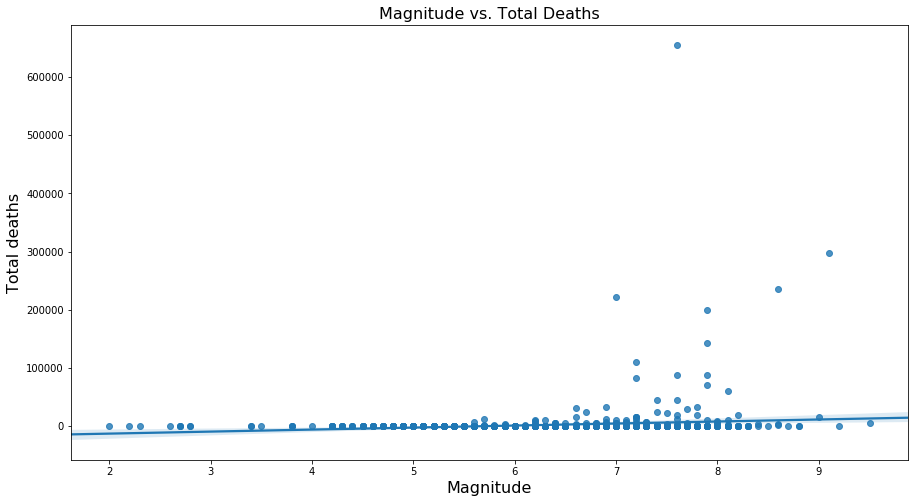

In [303]:
plt.figure(figsize=(15,8))
ax = sns.regplot(x= "Magnitude Numeric", y = "Max", data=earthquakedf)
plt.xlabel('Magnitude', fontsize=16)
plt.ylabel('Total deaths', fontsize=16)
plt.title("Magnitude vs. Total Deaths", fontsize=16)

# From the above scatter plot, we can see that only earthquakes at a magnitude of a 7 or above are 'catostrophic,' where the total death count climbs above 100,000.

In [304]:
step = 2
to_bin = lambda x: np.floor(x / step) * step
earthquakedf["latbin"] = earthquakedf.Lat.map(to_bin)
earthquakedf["lonbin"] = earthquakedf.Long.map(to_bin)
groups = earthquakedf.groupby(("latbin", "lonbin"))

C:\Users\chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  """


In [305]:
earthquakedf

0         Origin (UTC)            Country      Lat      Long  Depth (km)  \
1     1900-05-11 17:23              Japan  38.7000  141.1000         5.0   
2     1900-07-12 06:25             Turkey  40.3000   43.1000         NaN   
3     1900-10-29 09:11          Venezuela  11.0000  -66.0000         0.0   
4     1901-02-15 00:00              China  26.0000  100.1000         0.0   
5     1901-03-31 07:11           Bulgaria  43.4000   28.7000         NaN   
6     1901-08-09 09:23              Japan  40.5000  142.5000        35.0   
7     1901-11-15 20:15       New Zealand  -43.0000  173.0000         0.0   
8     1902-01-30 14:01              Japan  40.5000  141.3000        35.0   
9     1902-02-13 09:39         Azerbaijan  40.7000   48.6000        15.0   
10    1902-03-09 07:46             Turkey  40.7000   33.6000         NaN   
11    1902-04-19 02:23         Guatemala   14.0000  -91.0000         0.0   
12    1902-07-03 15:36              China  43.2000  129.6000        20.0   
13    1902-08-22 03:00              China  40.0000   77.0000         0.0   
14          1902-09-19          Australia -35.0000  138.0000         2.0   
15    1902-12-16 05:07         Uzbekistan  40.8000   72.3000         9.0   
16    1903-03-29 22:30  Judea and Samaria  32.2000   35.3000         NaN   
17          1903-04-28            Turkey   39.1400   42.6500         NaN   
18    1903-05-28 03:58             Turkey  40.9000   42.7000         NaN   
19    1903-08-11 04:32             Greece  36.3600   22.9700        80.0   
20    1903-09-25 01:20               Iran  35.2000   58.2000         NaN   
21    1904-04-24 06:39             Taiwan  23.5000  120.5000         NaN   
22    1904-08-11 05:56             Greece  37.7500   27.0000        10.0   
23    1904-08-30 11:42              China  30.0000  101.0000         0.0   
24    1904-11-05 20:25            Taiwan   23.5000  120.3000         NaN   
25    1905-04-04 00:50              India  33.0000   76.0000         0.0   
26    1905-06-01 04:42            Albania  42.1000   19.6000        20.0   
27    1905-06-02 05:39              Japan  34.1000  132.5000        55.0   
28    1905-09-08 01:43             Italy   39.0000   16.0000         0.0   
29    1905-11-08 22:06             Greece  40.0000   24.0000         0.0   
30    1906-01-31 15:36           Ecuador    1.0000  -81.5000         0.0   
...                ...                ...      ...       ...         ...   
1311  2008-05-25 08:21              China  32.5600  105.4230        18.0   
1312  2008-06-06 20:02            Algeria  35.8830   -0.6580         4.0   
1313  2008-06-08 12:25            Greece   37.9630   21.5250        16.0   
1314  2008-06-13 23:43             Japan   39.0300  140.8810         7.0   
1315  2008-06-17 05:51              China  32.7610  105.5540        10.0   
1316  2008-07-15 03:26            Greece   35.9830   27.7850        68.0   
1317  2008-08-21 12:24             China   25.1000   97.9000         NaN   
1318   2008-08-30 8:30             China   26.0000  101.9000        10.0   
1319  2008-10-05 15:52        Kyrgyzstan   39.5150   73.7680        27.6   
1320  2008-10-06 16:30             China       NaN       NaN         NaN   
1321  2008-10-28 23:09          Pakistan       NaN       NaN         NaN   
1322  2009-01-08 19:21        Costa Rica   10.3962  -84.0281        48.0   
1323  2009-04-06 03:32             Italy   42.3340   13.3340         8.8   
1324  2009-07-09 11:19             China       NaN       NaN         NaN   
1325  2009-08-10 20:07             Japan       NaN       NaN         NaN   
1326  2009-09-02 07:55         Indonesia       NaN       NaN         NaN   
1327  2009-09-29 17:48             Samoa       NaN       NaN         8.1   
1328  2009-09-30 10:16         Indonesia       NaN       NaN         NaN   
1329  2010-01-12 17:00             Haiti   18.4570  -72.5330        13.0   
1330  2010-02-27 06:34             Chile  -35.8460  -72.7190        35.0   
1331  2010-03-08 02:32            Turkey       N

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022CEF111208>]],
      dtype=object)

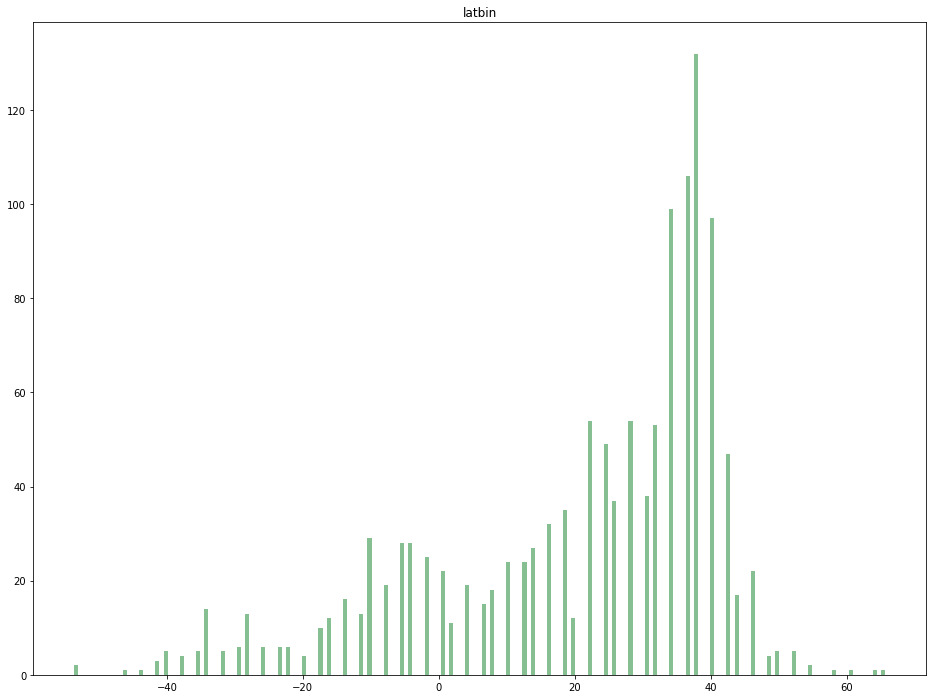

In [306]:
earthquakedf.hist(column='latbin', bins=100, grid=False, figsize=(16,12), color='#86bf91', zorder=2, rwidth=0.5,)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022CEF13ADA0>]],
      dtype=object)

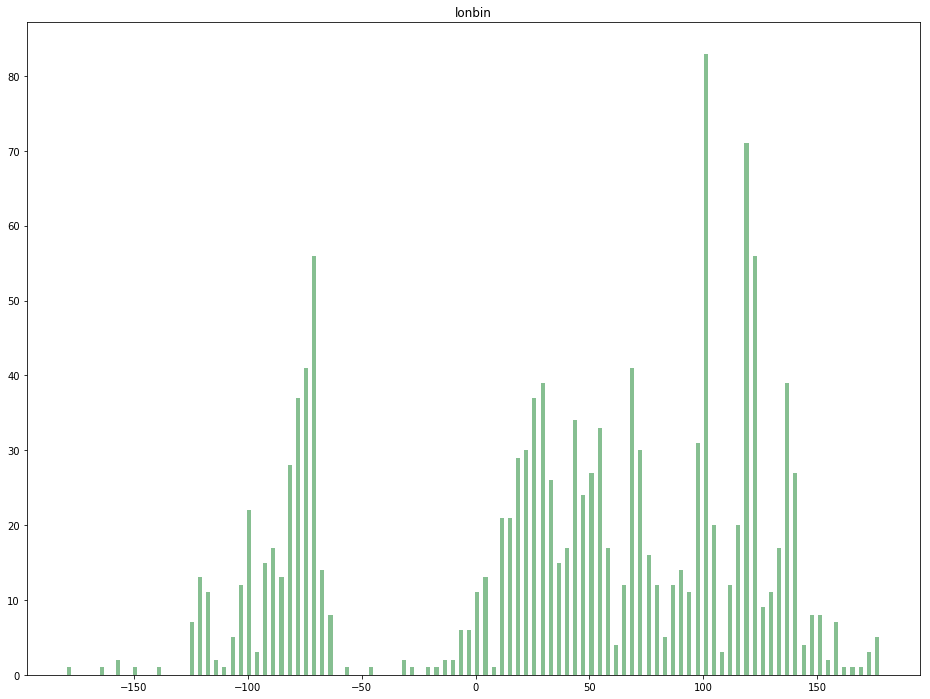

In [307]:
earthquakedf.hist(column='lonbin', bins=100, grid=False, figsize=(16,12), color='#86bf91', zorder=2, rwidth=0.5,)

In [308]:
earthquakedf2=earthquakedf.nlargest(10, "Max")

In [309]:
earthquakedf2

0         Origin (UTC)        Country     Lat     Long  Depth (km) Magnitude  \
584   1976-07-27 19:42         China   39.605  117.888        16.7    7.6 Mw   
1239  2004-12-26 00:58     Indonesia    3.287   95.972        30.0    9.1 Mw   
103   1920-12-16 12:05         China   36.601  105.317        25.0    8.6 Ms   
1329  2010-01-12 17:00         Haiti   18.457  -72.533        13.0    7.0 Mw   
141   1927-05-22 22:32         China   37.386  102.311        25.0    7.9 Ms   
117   1923-09-01 02:58         Japan   35.405  139.084        35.0   7.9 Muk   
303   1948-10-05 20:12  Turkmenistan   37.500   58.000         0.0    7.2 Mw   
1309  2008-05-12 06:28         China   31.002  103.322        19.0    7.9 Mw   
1254  2005-10-08 03:50      Pakistan   34.465   73.584        23.1    7.6 Mw   
42    1908-12-28 04:20         Italy   38.000   15.500         0.0    7.2 Ms   

0    Secondary Effects PDE Shaking Deaths  Magnitude Numeric Magnitude Units  \
584                NaN             655237                7.6              Mw   
1239               T,L                NaN                9.1              Mw   
103                NaN                NaN                8.6              Ms   
1329               NaN                NaN                7.0              Mw   
141                NaN                NaN                7.9              Ms   
117                T,F                NaN                7.9             Muk   
303                NaN                NaN                7.2              Mw   
1309                 L              69195                7.9              Mw   
1254              L,Lq              87351                7.6              Mw   
42                   T                NaN                7.2              Ms   

0     Other Source Deaths Numeric  EM-DAT Total Deaths Numeric  \
584                           NaN                     242000.0   
1239                247299.333333                          NaN   
103                           NaN                     180000.0   
1329                222517.000000                          NaN   
141                           NaN                     200000.0   
117                 105000.000000                     143000.0   
303                           NaN                     110000.0   
1309                          NaN                      87476.0   
1254                          NaN                      73338.0   
42                            NaN                      75000.0   

0     PDE Total Deaths Numeric  Utsu Total Deaths Numeric       Max  latbin  \
584                   655237.0                   242800.0  655237.0    38.0   
1239                  297200.0                        NaN  297200.0     2.0   
103                        NaN                   235502.0  235502.0    36.0   
1329                       NaN                        NaN  222517.0    18.0   
141                        NaN                    80000.0  200000.0    36.0   
117                        NaN                   142807.0  143000.0    34.0   
303                        NaN                    19800.0  110000.0    36.0   
1309                   88287.0                        NaN   88287.0    30.0   
1254                   87351.0                        NaN   87351.0    34.0   
42                         NaN                    82000.0   82000.0    38.0   

0     lonbin  
584    116.0  
1239    94.0  
103    104.0  
1329   -74.0  
141    102.0  
117    138.0  
303     58.0  
1309   102.0  
1254    72.0  
42      14.0

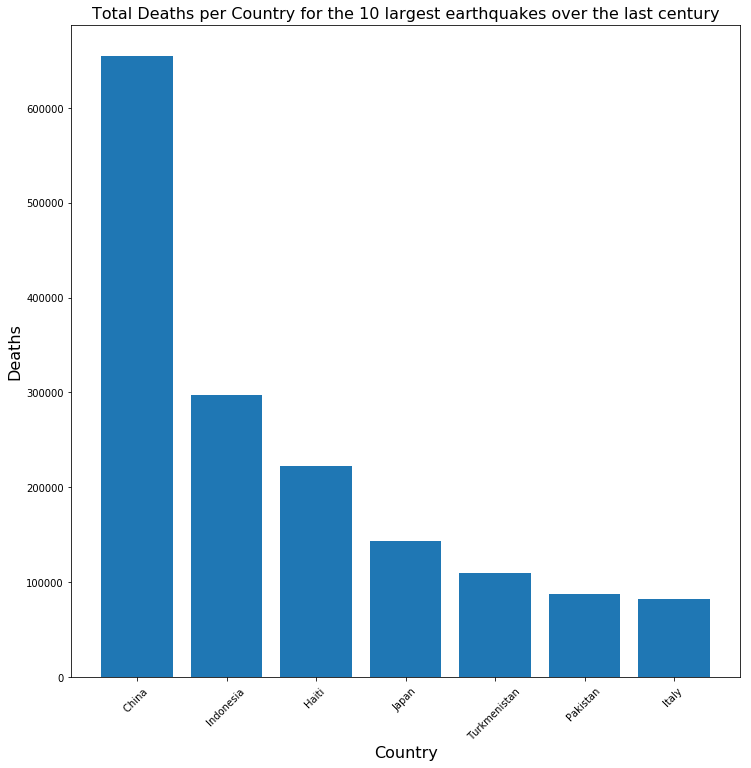

In [310]:
plt.figure(figsize=(12,12))
plt.bar(x='Country', height='Max', data = earthquakedf2)
plt.xticks(rotation=45)
plt.xlabel('Country',fontsize = 16)
plt.ylabel('Deaths', fontsize = 16)
plt.title('Total Deaths per Country for the 10 largest earthquakes over the last century',fontsize = 16)
plt.show()

In [311]:
earthquakedf3=earthquakedf.nlargest(10, "Magnitude Numeric")

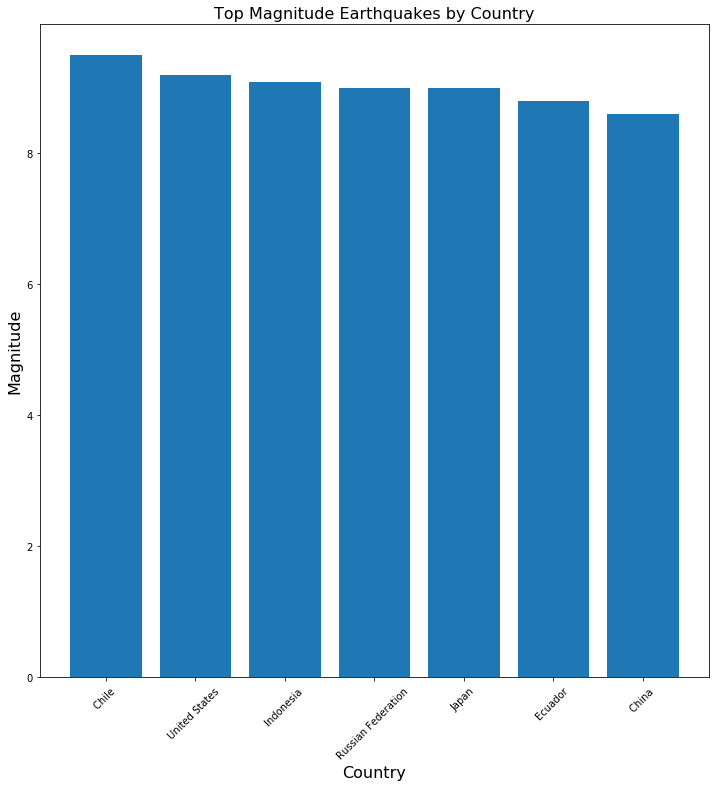

In [312]:
plt.figure(figsize=(12,12))
plt.bar(x='Country', height='Magnitude Numeric', data = earthquakedf3)
plt.xticks(rotation=45)
plt.xlabel('Country', fontsize = 16)
plt.ylabel('Magnitude', fontsize = 16)
plt.title('Top Magnitude Earthquakes by Country', fontsize = 16)
plt.show()

In [313]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

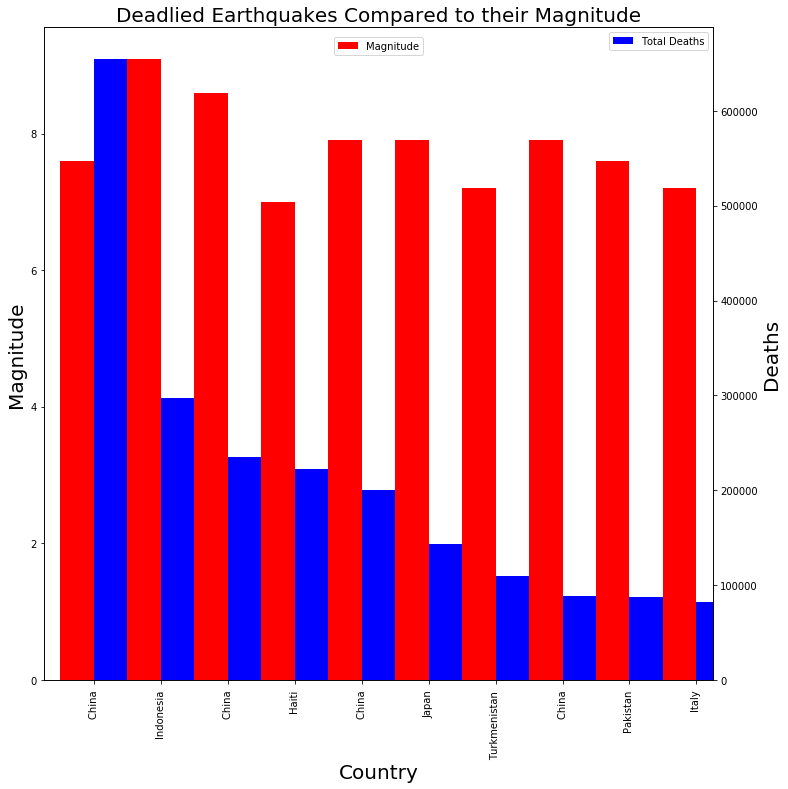

In [314]:
fig = plt.figure(figsize=(12,12)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

earthquakedf2['Max'].plot(kind='bar', x= 'Country', color='blue', ax=ax2, position=0, label= 'Total Deaths')
earthquakedf2['Magnitude Numeric'].plot(kind='bar', x= 'Country', color='red', ax=ax, position=1, label= 'Magnitude')

ax.set_xlabel('Country', fontsize=20)
ax.set_ylabel('Magnitude', fontsize=20)
ax2.set_ylabel('Deaths', fontsize=20)
plt.title("Deadlied Earthquakes Compared to their Magnitude", fontsize=20)
plt.xticks(np.arange(len(earthquakedf2)), earthquakedf2["Country"])
leg= ax.legend()
leg2=ax2.legend()
ax.legend(bbox_to_anchor=(.5, 1), loc=9, borderaxespad=1)
plt.show()

In [315]:
import geopandas as gpd
from shapely.geometry import Point
import folium

In [316]:
def make_point(earthquakedf):
    return Point(earthquakedf.Long, earthquakedf.Lat)

# Go through every row, and make a point out of its lat and lon
points = earthquakedf.apply(make_point, axis=1)

# Make a new GeoDataFrame
# using the data from our old df
# but also adding in the geometry we just made
GeoEarthquakes = gpd.GeoDataFrame(earthquakedf, geometry=points)

# It doesn't come with a CRS because it's a CSV, so let's
# say "hey, let's use the standard shape of the earth etc"
GeoEarthquakes.crs = {'init': 'epsg:4326'}

# Let's look at the first few
GeoEarthquakes.head()

#Source: http://jonathansoma.com/lede/foundations-2017/classes/geopandas/mapping-with-geopandas/

0      Origin (UTC)    Country   Lat   Long  Depth (km) Magnitude  \
1  1900-05-11 17:23      Japan  38.7  141.1         5.0  7.0 MJMA   
2  1900-07-12 06:25     Turkey  40.3   43.1         NaN   5.9 Muk   
3  1900-10-29 09:11  Venezuela  11.0  -66.0         0.0    7.7 Mw   
4  1901-02-15 00:00      China  26.0  100.1         0.0    6.5 Ms   
5  1901-03-31 07:11   Bulgaria  43.4   28.7         NaN   6.4 Muk   

0 Secondary Effects PDE Shaking Deaths  Magnitude Numeric Magnitude Units  \
1               NaN                NaN                7.0            MJMA   
2               NaN                NaN                5.9             Muk   
3               NaN                NaN                7.7              Mw   
4               NaN                NaN                6.5              Ms   
5               NaN                NaN                6.4             Muk   

0  Other Source Deaths Numeric  EM-DAT Total Deaths Numeric  \
1                          NaN                          NaN   
2                          NaN                          NaN   
3                          NaN                          NaN   
4                          NaN                          NaN   
5                          NaN                          NaN   

0  PDE Total Deaths Numeric  Utsu Total Deaths Numeric    Max  latbin  lonbin  \
1                       NaN                        NaN    NaN    38.0   140.0   
2                       NaN                      140.0  140.0    40.0    42.0   
3                       NaN                        NaN    NaN    10.0   -66.0   
4                       NaN                        NaN    NaN    26.0   100.0   
5                       NaN                        4.0    4.0    42.0    28.0   

0            geometry  
1  POINT (141.1 38.7)  
2   POINT (43.1 40.3)  
3      POINT (-66 11)  
4    POINT (100.1 26)  
5   POINT (28.7 43.4)

(-197.99999999999997,
 198.00000000000014,
 -98.68225650000004,
 92.32738650000003)

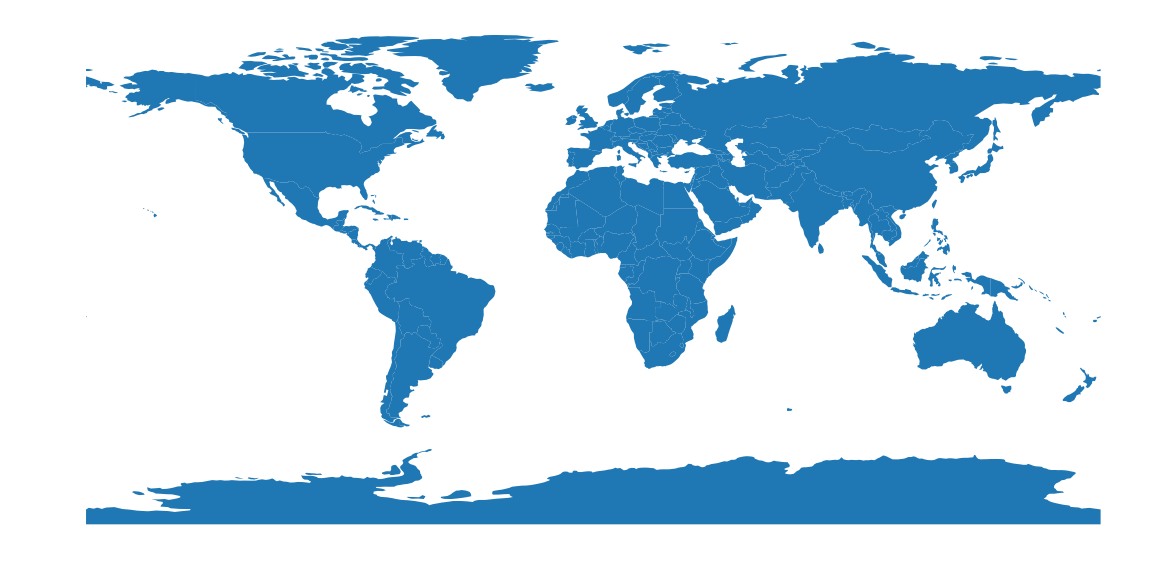

In [317]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(20,12))
ax.axis('off')

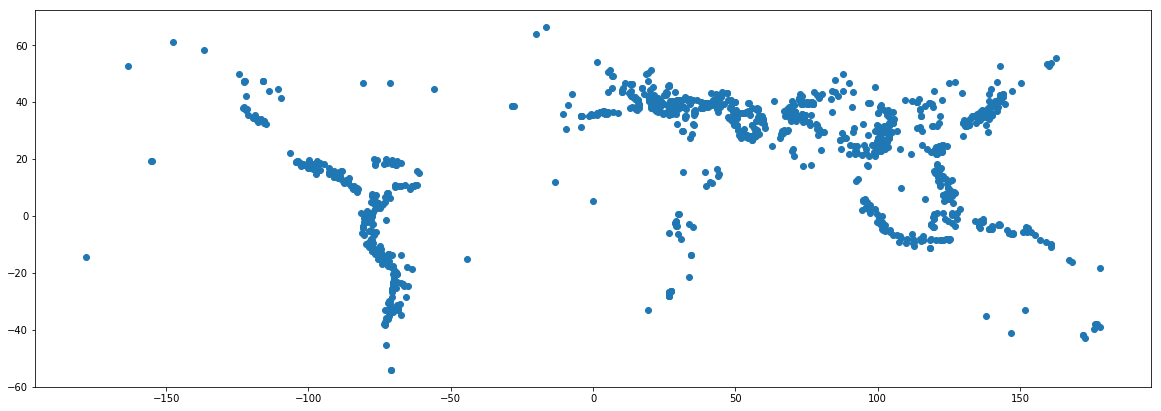

In [318]:
GeoEarthquakes.plot(figsize=(20,7))

In [319]:
plates=gpd.read_file('C:/Users/chris/data_science_projects/data-question-3-earthquakes-the-dream-crushers/tectonicplates/GeoJSON/PB2002_plates.json')

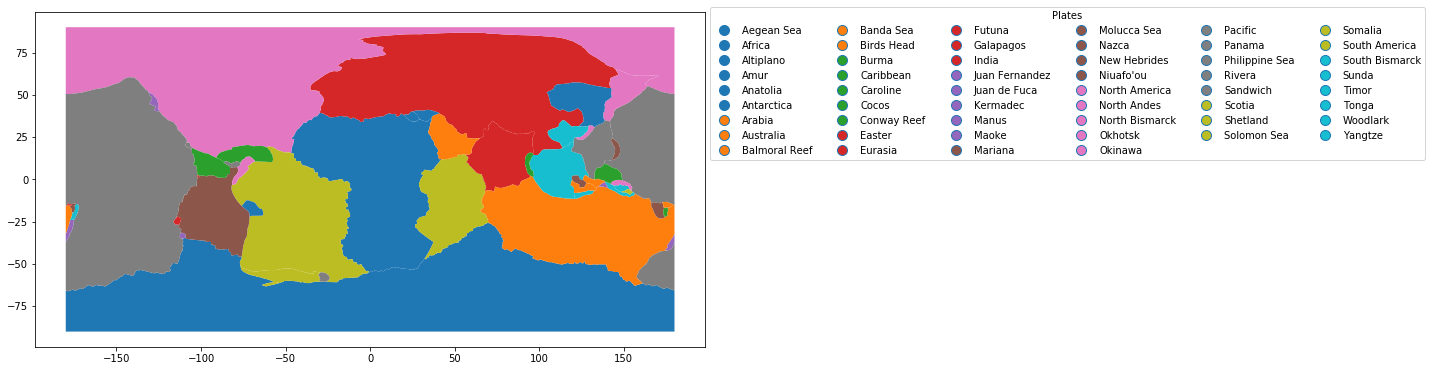

In [320]:
plates_kwds = {'title': 'Plates', 'loc': 'upper left', 'bbox_to_anchor': (1, 1.03), 'ncol': 6}
plates.plot(column = 'PlateName', figsize=(12, 12), legend = True, legend_kwds = plates_kwds)
plt.show()

(-197.99999999999994,
 198.00000000000014,
 -98.68225650000002,
 92.32738650000002)

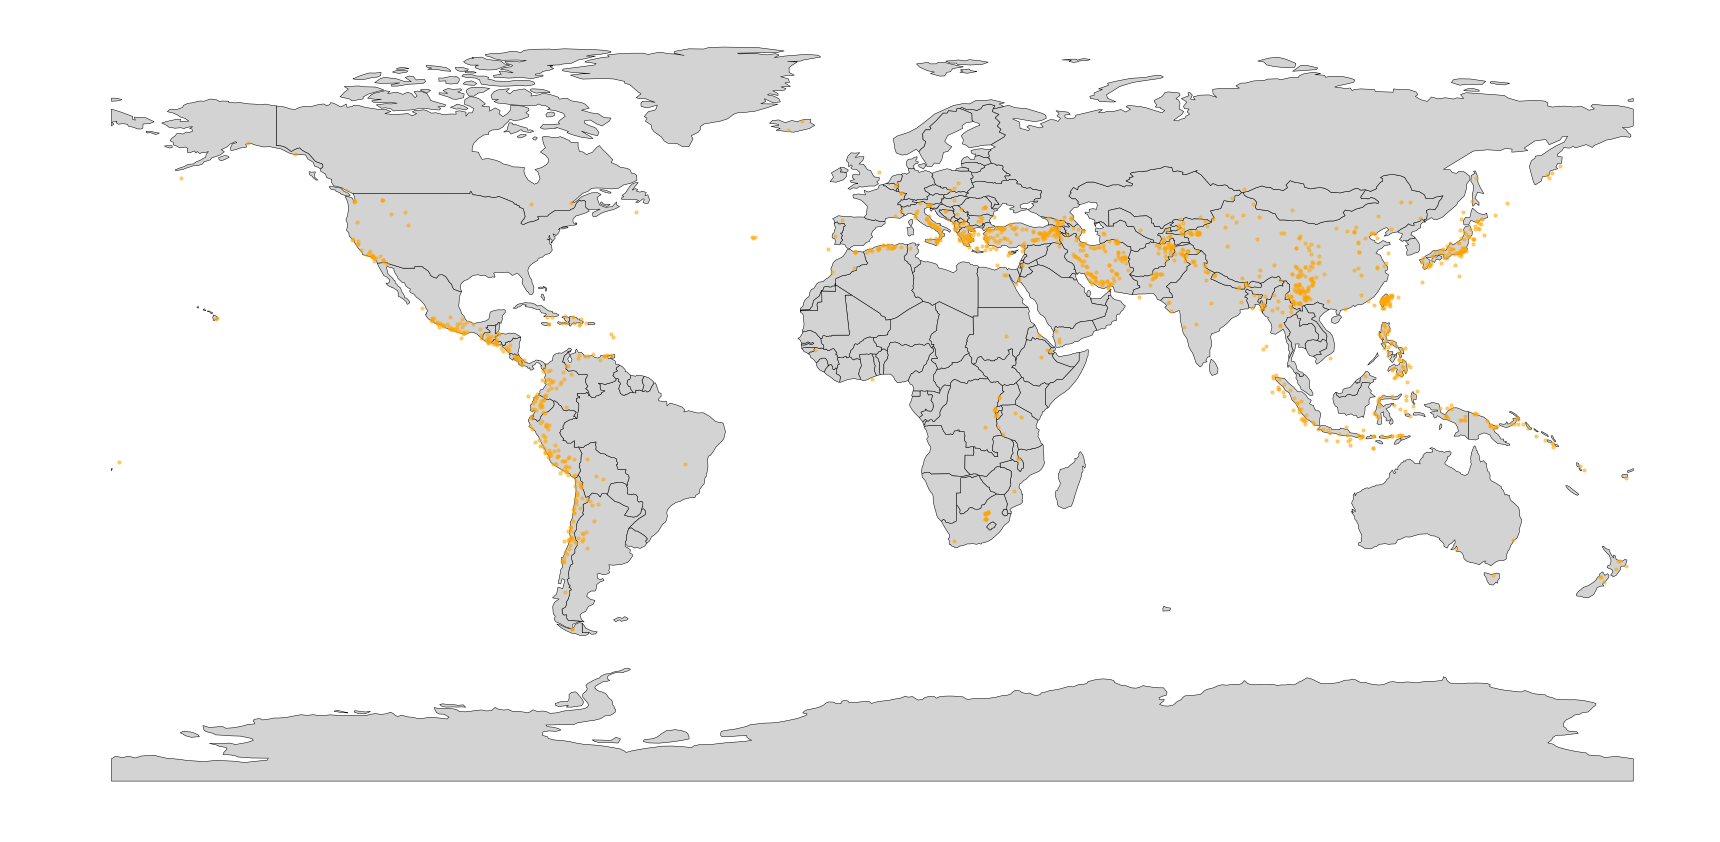

In [321]:
# Save the first layer as ax
ax = world.plot(color='lightgrey', linewidth=0.5, edgecolor='black', figsize=(30,30))
# Pass ax=ax to the second layer
GeoEarthquakes.plot(markersize=10, color='orange', alpha=0.5, ax=ax)
ax.axis('off')

# This map shows us that there are certain "hotspots" around the world where you would want to avoid living to eliminate the risk of experiencing an earthquake: The pacific coast of the western hemisphere (All the way from Alaska to Chile), Italy and the Mediterranean countries east of it, Japan, Southwest China, Indonesia, and the middle east outside of the Arabian Gulf. 

# However, that does not tell the whole story. You do not necessarily have a higher chance of death if you live in a earthquake-prone country. The wealth of a country--which is a determinant of factors like building codes--makes a huge difference. Let's look at the top 100 magnitude earthquakes and compare them to total deaths.

In [322]:
GeoEarthquakes.groupby(['Max']).size().sort_values(ascending=False)

Max
1.0       243
2.0       139
3.0        60
4.0        49
5.0        40
6.0        27
7.0        27
9.0        24
8.0        22
10.0       22
11.0       20
15.0       18
12.0       14
20.0       14
30.0       13
26.0       10
100.0       9
18.0        9
200.0       8
17.0        8
1000.0      8
13.0        8
24.0        7
500.0       7
16.0        7
35.0        7
60.0        7
50.0        7
22.0        7
29.0        6
         ... 
1409.0      1
1404.0      1
1314.0      1
1313.0      1
1305.0      1
1258.0      1
1251.0      1
1115.0      1
1086.0      1
1083.0      1
973.0       1
965.0       1
894.0       1
852.0       1
748.0       1
737.0       1
730.0       1
703.0       1
700.0       1
680.0       1
665.0       1
653.0       1
643.0       1
631.0       1
612.0       1
601.0       1
593.0       1
573.0       1
565.0       1
280.0       1
Length: 294, dtype: int64

In [323]:
GeoEarthquakes

0         Origin (UTC)            Country      Lat      Long  Depth (km)  \
1     1900-05-11 17:23              Japan  38.7000  141.1000         5.0   
2     1900-07-12 06:25             Turkey  40.3000   43.1000         NaN   
3     1900-10-29 09:11          Venezuela  11.0000  -66.0000         0.0   
4     1901-02-15 00:00              China  26.0000  100.1000         0.0   
5     1901-03-31 07:11           Bulgaria  43.4000   28.7000         NaN   
6     1901-08-09 09:23              Japan  40.5000  142.5000        35.0   
7     1901-11-15 20:15       New Zealand  -43.0000  173.0000         0.0   
8     1902-01-30 14:01              Japan  40.5000  141.3000        35.0   
9     1902-02-13 09:39         Azerbaijan  40.7000   48.6000        15.0   
10    1902-03-09 07:46             Turkey  40.7000   33.6000         NaN   
11    1902-04-19 02:23         Guatemala   14.0000  -91.0000         0.0   
12    1902-07-03 15:36              China  43.2000  129.6000        20.0   
13    1902-08-22 03:00              China  40.0000   77.0000         0.0   
14          1902-09-19          Australia -35.0000  138.0000         2.0   
15    1902-12-16 05:07         Uzbekistan  40.8000   72.3000         9.0   
16    1903-03-29 22:30  Judea and Samaria  32.2000   35.3000         NaN   
17          1903-04-28            Turkey   39.1400   42.6500         NaN   
18    1903-05-28 03:58             Turkey  40.9000   42.7000         NaN   
19    1903-08-11 04:32             Greece  36.3600   22.9700        80.0   
20    1903-09-25 01:20               Iran  35.2000   58.2000         NaN   
21    1904-04-24 06:39             Taiwan  23.5000  120.5000         NaN   
22    1904-08-11 05:56             Greece  37.7500   27.0000        10.0   
23    1904-08-30 11:42              China  30.0000  101.0000         0.0   
24    1904-11-05 20:25            Taiwan   23.5000  120.3000         NaN   
25    1905-04-04 00:50              India  33.0000   76.0000         0.0   
26    1905-06-01 04:42            Albania  42.1000   19.6000        20.0   
27    1905-06-02 05:39              Japan  34.1000  132.5000        55.0   
28    1905-09-08 01:43             Italy   39.0000   16.0000         0.0   
29    1905-11-08 22:06             Greece  40.0000   24.0000         0.0   
30    1906-01-31 15:36           Ecuador    1.0000  -81.5000         0.0   
...                ...                ...      ...       ...         ...   
1311  2008-05-25 08:21              China  32.5600  105.4230        18.0   
1312  2008-06-06 20:02            Algeria  35.8830   -0.6580         4.0   
1313  2008-06-08 12:25            Greece   37.9630   21.5250        16.0   
1314  2008-06-13 23:43             Japan   39.0300  140.8810         7.0   
1315  2008-06-17 05:51              China  32.7610  105.5540        10.0   
1316  2008-07-15 03:26            Greece   35.9830   27.7850        68.0   
1317  2008-08-21 12:24             China   25.1000   97.9000         NaN   
1318   2008-08-30 8:30             China   26.0000  101.9000        10.0   
1319  2008-10-05 15:52        Kyrgyzstan   39.5150   73.7680        27.6   
1320  2008-10-06 16:30             China       NaN       NaN         NaN   
1321  2008-10-28 23:09          Pakistan       NaN       NaN         NaN   
1322  2009-01-08 19:21        Costa Rica   10.3962  -84.0281        48.0   
1323  2009-04-06 03:32             Italy   42.3340   13.3340         8.8   
1324  2009-07-09 11:19             China       NaN       NaN         NaN   
1325  2009-08-10 20:07             Japan       NaN       NaN         NaN   
1326  2009-09-02 07:55         Indonesia       NaN       NaN         NaN   
1327  2009-09-29 17:48             Samoa       NaN       NaN         8.1   
1328  2009-09-30 10:16         Indonesia       NaN       NaN         NaN   
1329  2010-01-12 17:00             Haiti   18.4570  -72.5330        13.0   
1330  2010-02-27 06:34             Chile  -35.8460  -72.7190        35.0   
1331  2010-03-08 02:32            Turkey       N

In [324]:
GeoEarthquakes['Max'].nlargest(n=10)

584     655237.0
1239    297200.0
103     235502.0
1329    222517.0
141     200000.0
117     143000.0
303     110000.0
1309     88287.0
1254     87351.0
42       82000.0
Name: Max, dtype: float64

In [325]:
GeoEarthquakes['Magnitude Numeric'].nlargest(n=10)

397     9.5
417     9.2
1239    9.1
333     9.0
1336    9.0
30      8.8
1330    8.8
110     8.7
103     8.6
319     8.6
Name: Magnitude Numeric, dtype: float64

In [326]:
GeoEarthquakes_subset=GeoEarthquakes.nlargest(100, "Magnitude Numeric")

In [327]:
GeoEarthquakes_subset

0         Origin (UTC)              Country     Lat     Long  Depth (km)  \
397   1960-05-22 19:11               Chile  -38.235  -73.047        35.0   
417   1964-03-28 03:36       United States   61.017 -147.648         6.6   
1239  2004-12-26 00:58           Indonesia    3.287   95.972        30.0   
333   1952-11-04 16:58  Russian Federation   52.755  160.057        22.2   
1336  2011-03-11 14:46               Japan   38.322  142.369        24.4   
30    1906-01-31 15:36             Ecuador    1.000  -81.500         0.0   
1330  2010-02-27 06:34               Chile  -35.846  -72.719        35.0   
110   1922-11-11 04:32               Chile  -28.553  -70.755        35.0   
103   1920-12-16 12:05               China   36.601  105.317        25.0   
319   1950-08-15 14:09               China   28.500   96.500         0.0   
1247  2005-03-28 16:09           Indonesia    2.069   97.097        22.0   
113   1923-02-03 16:01   Russian Federation  53.853  160.761        35.0   
1292  2007-09-12 11:10            Indonesia  -4.440  101.370        34.0   
195   1933-03-02 17:31               Japan   39.224  144.622        35.0   
1136  2001-06-23 20:33                Peru  -16.385  -73.505        33.7   
19    1903-08-11 04:32               Greece  36.360   22.970        80.0   
124   1924-04-14 16:20         Philippines    7.023  125.954        33.0   
466   1968-05-16 00:49                Japan  40.903  143.346        25.8   
611   1977-08-19 06:08            Indonesia -11.126  118.380        22.6   
977   1994-10-04 13:22   Russian Federation  43.863  147.353        14.0   
1196  2003-09-25 19:50                Japan  41.864  143.878        27.0   
34    1906-08-17 00:40               Chile  -33.000  -72.000         0.0   
95    1918-08-15 12:18          Philippines   5.653  123.563        35.0   
259   1943-04-06 16:07                Chile -30.750  -72.000         0.0   
424   1965-01-24 00:11           Indonesia   -2.455  125.965        28.4   
446   1966-10-17 21:41                 Peru -10.807  -78.684        20.7   
971   1994-06-09 00:33             Bolivia  -13.860  -67.512       631.0   
1009  1996-02-17 05:59           Indonesia   -0.918  136.973        35.8   
62    1911-06-15 14:26                Japan  28.000  130.000        90.0   
188   1932-05-14 13:11            Indonesia   0.258  126.169        35.0   
...                ...                  ...     ...      ...         ...   
33    1906-04-18 13:12       United States   38.000 -123.000         0.0   
58    1911-01-03 23:25          Kazakhstan   43.500   77.500         0.0   
70    1913-08-06 22:14                 Peru -17.000  -74.000         0.0   
173   1931-01-15 01:50               Mexico  16.053  -96.614        35.0   
183   1931-10-03 19:13      Solomon Islands -10.932  161.016        35.0   
231   1939-12-26 23:57              Turkey   39.770   39.533        35.0   
252   1942-05-14 02:13              Ecuador   0.012  -79.902        35.0   
313   1949-12-17 06:53               Chile  -54.000  -71.000         0.0   
314   1949-12-17 15:07                Chile -54.000  -71.000         0.0   
360   1956-07-09 03:11               Greece  36.617   26.026        35.0   
371   1957-07-28 08:40               Mexico  16.881  -99.297        37.2   
375   1958-01-19 14:07              Ecuador   1.054  -79.480        35.0   
399   1960-11-20 22:02                 Peru  -6.727  -80.606        52.0   
480   1969-02-28 02:40            Portugal   35.923  -10.568        32.5   
513   1971-07-09 03:03                Chile -32.558  -71.085        59.0   
630   1978-11-29 19:52               Mexico  16.011  -96.603        24.8   
968   1994-06-02 18:17           Indonesia  -10.409  112.934        34.5   
1250  2005-06-13 22:44                Chile -20.007  -69.198       105.2   
3     1900-10-29 09:11            Venezuela  11.000  -66.000         0.0   
13    1902-08-22 03:00                China  40.000   77.000         0.0   
65    1912-05-23 02:24                Burma  21.

Text(0.5,1,'Magnitude vs. Total Deaths')

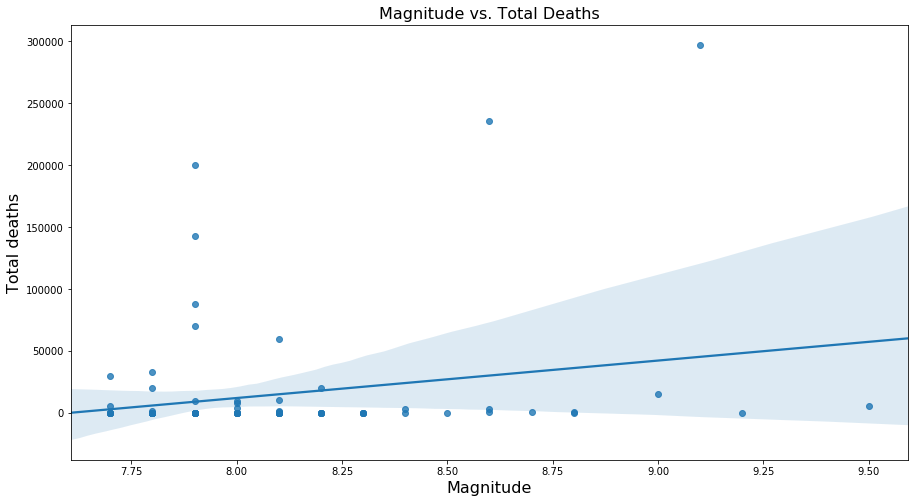

In [328]:
plt.figure(figsize=(15,8))
ax = sns.regplot(x= "Magnitude Numeric", y = "Max", data=GeoEarthquakes_subset)
plt.xlabel('Magnitude', fontsize=16)
plt.ylabel('Total deaths', fontsize=16)
plt.title("Magnitude vs. Total Deaths", fontsize=16)

In [329]:
GeoEarthquakes_subset['Max'].corr(GeoEarthquakes_subset['Magnitude Numeric'])

0.224679399097429

# 0.22 is a weak positive correlation between deaths and magnitude.

In [330]:
GeoEarthquakes['Max'].corr(GeoEarthquakes['Magnitude Numeric'])

0.13967890128546204

# The positive correation is even weaker if we consider all earthquakes: 0.14

# Now let's subset our data to look at the top 100 earthquakes in terms of total fatalities. 

In [331]:
GeoEarthquakes_subset2=GeoEarthquakes.nlargest(100, "Max")

In [332]:
GeoEarthquakes_subset2

0         Origin (UTC)            Country     Lat     Long  Depth (km)  \
584   1976-07-27 19:42             China   39.605  117.888        16.7   
1239  2004-12-26 00:58         Indonesia    3.287   95.972        30.0   
103   1920-12-16 12:05             China   36.601  105.317        25.0   
1329  2010-01-12 17:00             Haiti   18.457  -72.533        13.0   
141   1927-05-22 22:32             China   37.386  102.311        25.0   
117   1923-09-01 02:58             Japan   35.405  139.084        35.0   
303   1948-10-05 20:12      Turkmenistan   37.500   58.000         0.0   
1309  2008-05-12 06:28             China   31.002  103.322        19.0   
1254  2005-10-08 03:50          Pakistan   34.465   73.584        23.1   
42    1908-12-28 04:20             Italy   38.000   15.500         0.0   
499   1970-05-31 20:23              Peru   -9.248  -78.840        73.0   
210   1935-05-30 21:32          Pakistan   28.894   66.176        35.0   
875   1990-06-20 21:00              Iran   37.001   49.216        17.9   
1079  1999-08-17 00:01            Turkey   40.773   30.003        13.3   
231   1939-12-26 23:57            Turkey   39.770   39.533        35.0   
80    1915-01-13 06:52             Italy   42.000   13.500         0.0   
1207  2003-12-26 01:56              Iran   28.950   58.268         6.0   
226   1939-01-25 03:32             Chile  -36.200  -72.200         0.0   
629   1978-09-16 15:35              Iran   33.242   57.382         8.2   
833   1988-12-07 07:41           Armenia   40.919   44.118         6.7   
565   1976-02-04 09:01         Guatemala   15.296  -89.145        12.3   
1126  2001-01-26 03:16             India   23.402   70.287        23.3   
25    1905-04-04 00:50              India  33.000   76.000         0.0   
34    1906-08-17 00:40             Chile  -33.000  -72.000         0.0   
1336  2011-03-11 14:46             Japan   38.322  142.369        24.4   
492   1970-01-04 17:00             China   24.147  102.462        14.0   
40    1907-10-21 04:23        Tajikistan   38.000   69.000         0.0   
88    1917-01-21 23:11          Indonesia  -7.000  116.000         NaN   
473   1968-08-31 10:47              Iran   34.045   58.960        12.3   
394   1960-02-29 23:40           Morocco   30.500   -9.500         NaN   
...                ...                ...     ...      ...         ...   
207   1935-04-20 22:02            Taiwan   24.364  120.613        35.0   
154   1929-05-01 15:37      Turkmenistan   37.957   57.693        25.0   
319   1950-08-15 14:09             China   28.500   96.500         0.0   
195   1933-03-02 17:31             Japan   39.224  144.622        35.0   
256   1942-12-20 14:03            Turkey   40.671   36.450        35.0   
373   1957-12-13 01:45               Iran  34.278   47.712        35.0   
485   1969-07-25 22:49             China   21.612  111.809         3.4   
685   1981-06-11 07:24               Iran  29.858   57.686        17.3   
138   1927-03-07 09:27              Japan  35.802  134.924         9.6   
66    1912-08-09 01:29            Turkey   40.500   27.000         0.0   
705   1982-12-13 09:12             Yemen   14.675   44.223         7.0   
1055  1998-07-17 08:49  Papua New Guinea   -2.946  142.520        23.0   
1333  2010-04-14 23:49             China      NaN      NaN         NaN   
934   1992-12-12 05:29         Indonesia   -8.498  121.832        28.0   
444   1966-08-19 12:22            Turkey   39.161   41.580        17.5   
162   1930-05-06 22:34              Iran   38.152   44.685        25.0   
28    1905-09-08 01:43             Italy   39.000   16.000         0.0   
370   1957-07-02 00:42               Iran  36.090   52.701        35.0   
1083  1999-09-20 17:47            Taiwan   23.819  120.877        21.0   
878   1990-07-16 07:26       Philippines   15.721  121.180        24.3   
558   1975-09-06 09:20            Turkey   38.515   40.768        39.6   
1043  1998-02-04 14:33       Afghanistan   37.080   70.004        17.6   
271 

Text(0.5,1,'Magnitude vs. Total Deaths')

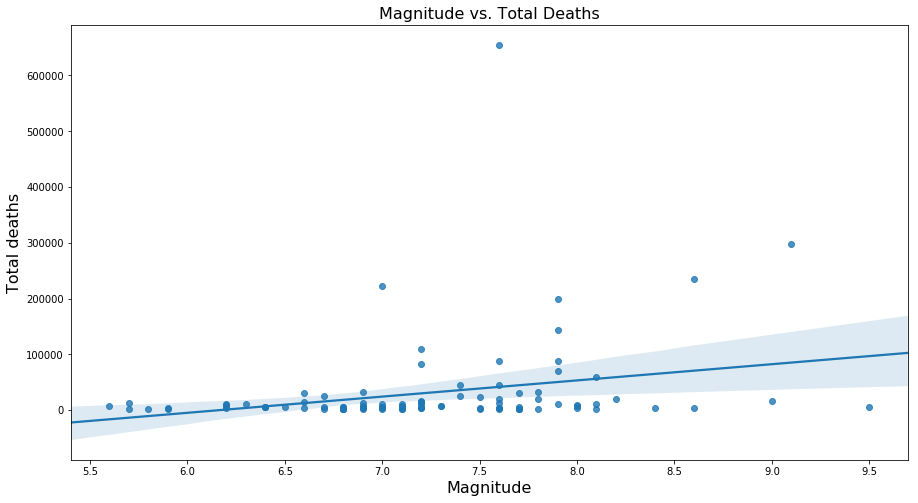

In [333]:
plt.figure(figsize=(15,8))
ax = sns.regplot(x= "Magnitude Numeric", y = "Max", data=GeoEarthquakes_subset2)
plt.xlabel('Magnitude', fontsize=16)
plt.ylabel('Total deaths', fontsize=16)
plt.title("Magnitude vs. Total Deaths", fontsize=16)

In [334]:
GeoEarthquakes_subset2['Max'].corr(GeoEarthquakes_subset2['Magnitude Numeric'])

0.26215571691839323

# We are still seeing the same trend (a relateively weak correlation between magnitude and total deaths). 

# Let's just look at the top 100 deadliest earthquakes on a map. 

(-197.99999999999997,
 198.00000000000014,
 -98.68225650000004,
 92.32738650000003)

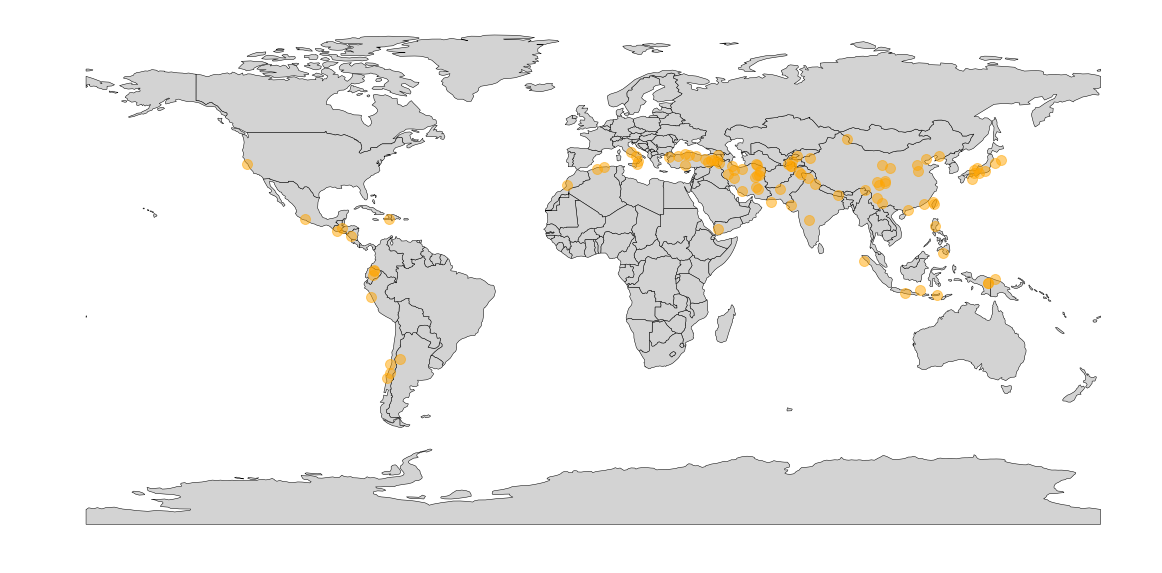

In [335]:
# Save the first layer as ax
ax = world.plot(color='lightgrey', linewidth=0.5, edgecolor='black', figsize=(20,20))
# Pass ax=ax to the second layer
GeoEarthquakes_subset2.plot(markersize=100, color='orange', alpha=0.5, ax=ax)
ax.axis('off')

# With the exception of a Italy and and Japan, the deadliest earthquakes generally occur in underdeveloped countries. 

In [336]:
import fiona 
import shapely

In [337]:
GeoEarthquakes_subset2

0         Origin (UTC)            Country     Lat     Long  Depth (km)  \
584   1976-07-27 19:42             China   39.605  117.888        16.7   
1239  2004-12-26 00:58         Indonesia    3.287   95.972        30.0   
103   1920-12-16 12:05             China   36.601  105.317        25.0   
1329  2010-01-12 17:00             Haiti   18.457  -72.533        13.0   
141   1927-05-22 22:32             China   37.386  102.311        25.0   
117   1923-09-01 02:58             Japan   35.405  139.084        35.0   
303   1948-10-05 20:12      Turkmenistan   37.500   58.000         0.0   
1309  2008-05-12 06:28             China   31.002  103.322        19.0   
1254  2005-10-08 03:50          Pakistan   34.465   73.584        23.1   
42    1908-12-28 04:20             Italy   38.000   15.500         0.0   
499   1970-05-31 20:23              Peru   -9.248  -78.840        73.0   
210   1935-05-30 21:32          Pakistan   28.894   66.176        35.0   
875   1990-06-20 21:00              Iran   37.001   49.216        17.9   
1079  1999-08-17 00:01            Turkey   40.773   30.003        13.3   
231   1939-12-26 23:57            Turkey   39.770   39.533        35.0   
80    1915-01-13 06:52             Italy   42.000   13.500         0.0   
1207  2003-12-26 01:56              Iran   28.950   58.268         6.0   
226   1939-01-25 03:32             Chile  -36.200  -72.200         0.0   
629   1978-09-16 15:35              Iran   33.242   57.382         8.2   
833   1988-12-07 07:41           Armenia   40.919   44.118         6.7   
565   1976-02-04 09:01         Guatemala   15.296  -89.145        12.3   
1126  2001-01-26 03:16             India   23.402   70.287        23.3   
25    1905-04-04 00:50              India  33.000   76.000         0.0   
34    1906-08-17 00:40             Chile  -33.000  -72.000         0.0   
1336  2011-03-11 14:46             Japan   38.322  142.369        24.4   
492   1970-01-04 17:00             China   24.147  102.462        14.0   
40    1907-10-21 04:23        Tajikistan   38.000   69.000         0.0   
88    1917-01-21 23:11          Indonesia  -7.000  116.000         NaN   
473   1968-08-31 10:47              Iran   34.045   58.960        12.3   
394   1960-02-29 23:40           Morocco   30.500   -9.500         NaN   
...                ...                ...     ...      ...         ...   
207   1935-04-20 22:02            Taiwan   24.364  120.613        35.0   
154   1929-05-01 15:37      Turkmenistan   37.957   57.693        25.0   
319   1950-08-15 14:09             China   28.500   96.500         0.0   
195   1933-03-02 17:31             Japan   39.224  144.622        35.0   
256   1942-12-20 14:03            Turkey   40.671   36.450        35.0   
373   1957-12-13 01:45               Iran  34.278   47.712        35.0   
485   1969-07-25 22:49             China   21.612  111.809         3.4   
685   1981-06-11 07:24               Iran  29.858   57.686        17.3   
138   1927-03-07 09:27              Japan  35.802  134.924         9.6   
66    1912-08-09 01:29            Turkey   40.500   27.000         0.0   
705   1982-12-13 09:12             Yemen   14.675   44.223         7.0   
1055  1998-07-17 08:49  Papua New Guinea   -2.946  142.520        23.0   
1333  2010-04-14 23:49             China      NaN      NaN         NaN   
934   1992-12-12 05:29         Indonesia   -8.498  121.832        28.0   
444   1966-08-19 12:22            Turkey   39.161   41.580        17.5   
162   1930-05-06 22:34              Iran   38.152   44.685        25.0   
28    1905-09-08 01:43             Italy   39.000   16.000         0.0   
370   1957-07-02 00:42               Iran  36.090   52.701        35.0   
1083  1999-09-20 17:47            Taiwan   23.819  120.877        21.0   
878   1990-07-16 07:26       Philippines   15.721  121.180        24.3   
558   1975-09-06 09:20            Turkey   38.515   40.768        39.6   
1043  1998-02-04 14:33       Afghanistan   37.080   70.004        17.6   
271 

In [338]:
GeoEarthquakes_subset2.columns = GeoEarthquakes_subset2.columns.str.strip()

In [339]:
from folium.plugins import MarkerCluster

In [340]:
popups, locations = [], []


earthquake_map = folium.Map(location=[GeoEarthquakes_subset2['Lat'].mean(), GeoEarthquakes_subset2['Long'].mean()], zoom_start=3)
count = 0
folium.GeoJson(plates.geometry).add_to(earthquake_map)
for row in GeoEarthquakes_subset2.iterrows():
    row_values = row[1] 
    if np.isnan(row_values['Lat']) or np.isnan(row_values['Long']): 
        continue
    locations.append([row_values['Lat'], row_values['Long']])
    GeoEarthquakes_subset2['Lat'] = pd.to_numeric(GeoEarthquakes_subset2['Lat'])
    GeoEarthquakes_subset2['Long']= pd.to_numeric(GeoEarthquakes_subset2['Long'])
    country = row_values['Country'] 
    magnitude = row_values['Magnitude Numeric']
    popup = (str(row_values['Country']) + '<br/>' + 
        'Year: ' + str(row_values['Origin (UTC)']) + '<br/>' +
        'Magnitude: ' + str(row_values['Magnitude Numeric']) + '<br/>' +
        'Deaths: ' + str(row_values['Max'])).replace("'", "`")
    popups.append(popup)
    t = folium.FeatureGroup(name='Earthquakes')
    count += 1

t.add_child(MarkerCluster(locations=locations, popups=popups))
earthquake_map.add_child(t)
earthquake_map.add_child(folium.LayerControl())
earthquake_map


In [355]:
hdi = pd.read_csv(r'C:\Users\chris\data_science_projects\data-question-1-Cjcarlevato\data\HDI.csv', encoding='ISO-8859-1')

In [356]:
hdi.head()

HDI_Rank_2017       Country      Mean
0            168   Afghanistan  0.448562
1             68       Albania  0.695929
2             85       Algeria  0.672000
3             35       Andorra  0.825833
4            147        Angola  0.491526

In [343]:
# hdi.drop(hdi.iloc[:, 2:30], inplace=True, axis=1)

In [357]:
hdi.head()

HDI_Rank_2017       Country      Mean
0            168   Afghanistan  0.448562
1             68       Albania  0.695929
2             85       Algeria  0.672000
3             35       Andorra  0.825833
4            147        Angola  0.491526

In [358]:
hdi["Country"]= hdi.Country.str.strip()

In [359]:
GeoEarthquakes_subset2.head()

0         Origin (UTC)     Country     Lat     Long  Depth (km) Magnitude  \
584   1976-07-27 19:42      China   39.605  117.888        16.7    7.6 Mw   
1239  2004-12-26 00:58  Indonesia    3.287   95.972        30.0    9.1 Mw   
103   1920-12-16 12:05      China   36.601  105.317        25.0    8.6 Ms   
1329  2010-01-12 17:00      Haiti   18.457  -72.533        13.0    7.0 Mw   
141   1927-05-22 22:32      China   37.386  102.311        25.0    7.9 Ms   

0    Secondary Effects PDE Shaking Deaths  Magnitude Numeric Magnitude Units  \
584                NaN             655237                7.6              Mw   
1239               T,L                NaN                9.1              Mw   
103                NaN                NaN                8.6              Ms   
1329               NaN                NaN                7.0              Mw   
141                NaN                NaN                7.9              Ms   

0     Other Source Deaths Numeric  EM-DAT Total Deaths Numeric  \
584                           NaN                     242000.0   
1239                247299.333333                          NaN   
103                           NaN                     180000.0   
1329                222517.000000                          NaN   
141                           NaN                     200000.0   

0     PDE Total Deaths Numeric  Utsu Total Deaths Numeric       Max  latbin  \
584                   655237.0                   242800.0  655237.0    38.0   
1239                  297200.0                        NaN  297200.0     2.0   
103                        NaN                   235502.0  235502.0    36.0   
1329                       NaN                        NaN  222517.0    18.0   
141                        NaN                    80000.0  200000.0    36.0   

0     lonbin                         geometry  
584    116.0           POINT (117.888 39.605)  
1239    94.0  POINT (95.97200000000001 3.287)  
103    104.0           POINT (105.317 36.601)  
1329   -74.0           POINT (-72.533 18.457)  
141    102.0           POINT (102.311 37.386)

In [347]:
# GeoEarthquakes_subset2.drop(['Mean', 'HDI'], axis=1, inplace=True)

KeyError: "labels ['Mean' 'HDI'] not contained in axis"

In [360]:
hdi['HDI_Rank_2017'] = pd.to_numeric(hdi['HDI_Rank_2017'], errors = 'coerce')
hdi['Mean'] = pd.to_numeric(hdi['Mean'], errors = 'coerce')
#HDI mean the mean from 1990 to 2017 (HDI first started in 1990)

In [361]:
hdi

HDI_Rank_2017                                    Country      Mean
0              168                                Afghanistan  0.448562
1               68                                    Albania  0.695929
2               85                                    Algeria  0.672000
3               35                                    Andorra  0.825833
4              147                                     Angola  0.491526
5               70                        Antigua and Barbuda  0.771308
6               47                                  Argentina  0.775250
7               83                                    Armenia  0.677250
8                3                                  Australia  0.904786
9               20                                    Austria  0.854964
10              80                                 Azerbaijan  0.693043
11              54                                    Bahamas  0.792500
12              43                                    Bahrain  0.791250
13             136                                 Bangladesh  0.494821
14              58                                   Barbados  0.760536
15              53                                    Belarus  0.740130
16              17                                    Belgium  0.877857
17             106                                     Belize  0.684357
18             163                                      Benin  0.430000
19             134                                     Bhutan  0.569308
20             118           Bolivia (Plurinational State of)  0.617607
21              77                     Bosnia and Herzegovina  0.718556
22             101                                   Botswana  0.617429
23              79                                     Brazil  0.693107
24              39                          Brunei Darussalam  0.826357
25              51                                   Bulgaria  0.742964
26             183                               Burkina Faso  0.357000
27             185                                    Burundi  0.343786
28             125                                 Cabo Verde  0.618389
29             146                                   Cambodia  0.469107
..             ...                                        ...       ...
159             76                                  Sri Lanka  0.703643
160            167                                      Sudan  0.423750
161            100                                   Suriname  0.699786
162              7                                     Sweden  0.888286
163              2                                Switzerland  0.894857
164            155                       Syrian Arab Republic  0.596111
165            127                                 Tajikistan  0.596536
166            154              Tanzania (United Republic of)  0.437893
167             83                                   Thailand  0.672286
168             80  The former Yugoslav Republic of Macedonia  0.719500
169            132                                Timor-Leste  0.575611
170            165                                       Togo  0.438679
171             98                                      Tonga  0.689643
172             69                        Trinidad and Tobago  0.734250
173             95                                    Tunisia  0.666929
174             64                                     Turkey  0.682429
175            108                               Turkmenistan  0.692500
176            162                                     Uganda  0.417429
177             88                                    Ukraine  0.706607
178             34                       United Arab Emirates  0.807750
179             14                             United Kingdom  0.871143
180             13                              United States  0.895071
181             55                                    Uruguay  0.751393
182            105                           

In [362]:
GeoandHdi=pd.merge(GeoEarthquakes_subset2, hdi, left_on='Country', right_on='Country')

In [ ]:
# GeoandHdi=pd.merge(GeoEarthquakes_subset2, hdi, left_on='Country', right_on='Country')

In [363]:
GeoandHdi

Origin (UTC)     Country     Lat     Long  Depth (km) Magnitude  \
0   1905-04-04 00:50       India  33.000   76.000         0.0    7.8 Mw   
1   1917-01-21 23:11   Indonesia  -7.000  116.000         NaN   6.6 Muk   
2   1976-10-29 02:51   Indonesia  -4.475  139.991        15.0    6.8 Mw   
3   1925-03-16 14:42       China  25.688  100.494        25.0    7.0 Ms   
4   1902-08-22 03:00       China  40.000   77.000         0.0    7.7 Mw   
5   1923-03-24 12:40       China  30.553  101.258        25.0    7.2 Mw   
6   1937-07-31 20:35       China  35.252  115.153        25.0   6.9 Muk   
7   1973-02-06 10:37       China  31.353  100.545        10.0   7.7 Muk   
8   1980-10-10 12:25     Algeria  36.143    1.404        15.0    7.1 Mw   
9   1987-03-06 04:10     Ecuador   0.082  -77.787        17.1    7.1 Mw   
10  1902-12-16 05:07  Uzbekistan  40.800   72.300         9.0   6.4 Muk   
11  1927-03-07 09:27       Japan  35.802  134.924         9.6    7.6 Ms   

   Secondary Effects PDE Shaking Deaths  Magnitude Numeric Magnitude Units  \
0                NaN                NaN                7.8              Mw   
1                  T                NaN                6.6             Muk   
2                NaN                133                6.8              Mw   
3                NaN                NaN                7.0              Ms   
4                NaN                NaN                7.7              Mw   
5                NaN                NaN                7.2              Mw   
6                NaN                NaN                6.9             Muk   
7                NaN                NaN                7.7             Muk   
8                NaN               5000                7.1              Mw   
9                  L               1000                7.1              Mw   
10               NaN                NaN                6.4             Muk   
11               T,F                NaN                7.6              Ms   

    Other Source Deaths Numeric  EM-DAT Total Deaths Numeric  \
0                           NaN                      20000.0   
1                           NaN                          NaN   
2                           NaN                          NaN   
3                           NaN                       5000.0   
4                           NaN                          NaN   
5                           NaN                       5000.0   
6                           NaN                          NaN   
7                           NaN                          NaN   
8                           NaN                       2633.0   
9                           NaN                          NaN   
10                          NaN                          NaN   
11                          NaN                       2925.0   

    PDE Total Deaths Numeric  Utsu Total Deaths Numeric      Max  latbin  \
0                        NaN                    20000.0  20000.0    32.0   
1                        NaN                    15000.0  15000.0    -8.0   
2                      133.0                     6000.0   6000.0    -6.0   
3                        NaN                     5808.0   5808.0    24.0   
4                        NaN                     5650.0   5650.0    40.0   
5                        NaN                      450.0   5000.0    30.0   
6                        NaN                     3833.0   3833.0    34.0   
7                        NaN                     2199.0   2199.0    30.0   
8                     5000.0                     3500.0   5000.0    36.0   
9                     5000.0                     5000.0   5000.0     0.0   
10                       NaN                     4725.0   4725.0    40.0   
11                       NaN                     2925.0   2925.0    34.0   

    lonbin                                        geometry  HDI_Rank_2017  \
0     76.0                                   POINT (76 33)            130   
1    116.0                               

In [364]:
GeoandHdi['Max'].corr(GeoandHdi['Mean'])

-0.5764295660795173

In [365]:
GeoandHdi['Mean'].corr(GeoandHdi['Max'])

-0.5764295660795173

Text(0.5,1,'Random Sample of 100 Earthquakes vs. HDI')

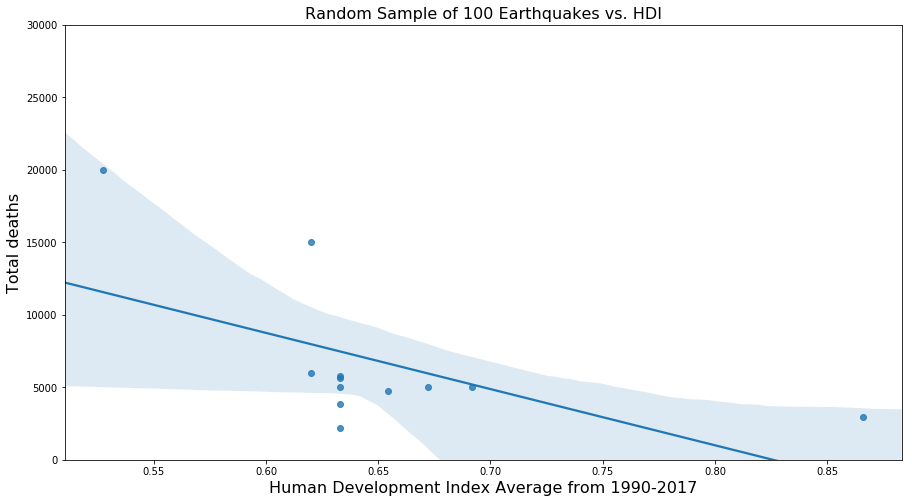

In [366]:
plt.figure(figsize=(15,8))
ax = sns.regplot(x= "Mean", y = "Max", data=GeoandHdi)
plt.xlabel('Human Development Index Average from 1990-2017', fontsize=16)
plt.ylabel('Total deaths', fontsize=16)
ax.set_ylim(0, 30000)
plt.title("Random Sample of 100 Earthquakes vs. HDI", fontsize=16)

In [367]:
GeoEarthquakes_subset2

0         Origin (UTC)            Country     Lat     Long  Depth (km)  \
584   1976-07-27 19:42             China   39.605  117.888        16.7   
1239  2004-12-26 00:58         Indonesia    3.287   95.972        30.0   
103   1920-12-16 12:05             China   36.601  105.317        25.0   
1329  2010-01-12 17:00             Haiti   18.457  -72.533        13.0   
141   1927-05-22 22:32             China   37.386  102.311        25.0   
117   1923-09-01 02:58             Japan   35.405  139.084        35.0   
303   1948-10-05 20:12      Turkmenistan   37.500   58.000         0.0   
1309  2008-05-12 06:28             China   31.002  103.322        19.0   
1254  2005-10-08 03:50          Pakistan   34.465   73.584        23.1   
42    1908-12-28 04:20             Italy   38.000   15.500         0.0   
499   1970-05-31 20:23              Peru   -9.248  -78.840        73.0   
210   1935-05-30 21:32          Pakistan   28.894   66.176        35.0   
875   1990-06-20 21:00              Iran   37.001   49.216        17.9   
1079  1999-08-17 00:01            Turkey   40.773   30.003        13.3   
231   1939-12-26 23:57            Turkey   39.770   39.533        35.0   
80    1915-01-13 06:52             Italy   42.000   13.500         0.0   
1207  2003-12-26 01:56              Iran   28.950   58.268         6.0   
226   1939-01-25 03:32             Chile  -36.200  -72.200         0.0   
629   1978-09-16 15:35              Iran   33.242   57.382         8.2   
833   1988-12-07 07:41           Armenia   40.919   44.118         6.7   
565   1976-02-04 09:01         Guatemala   15.296  -89.145        12.3   
1126  2001-01-26 03:16             India   23.402   70.287        23.3   
25    1905-04-04 00:50              India  33.000   76.000         0.0   
34    1906-08-17 00:40             Chile  -33.000  -72.000         0.0   
1336  2011-03-11 14:46             Japan   38.322  142.369        24.4   
492   1970-01-04 17:00             China   24.147  102.462        14.0   
40    1907-10-21 04:23        Tajikistan   38.000   69.000         0.0   
88    1917-01-21 23:11          Indonesia  -7.000  116.000         NaN   
473   1968-08-31 10:47              Iran   34.045   58.960        12.3   
394   1960-02-29 23:40           Morocco   30.500   -9.500         NaN   
...                ...                ...     ...      ...         ...   
207   1935-04-20 22:02            Taiwan   24.364  120.613        35.0   
154   1929-05-01 15:37      Turkmenistan   37.957   57.693        25.0   
319   1950-08-15 14:09             China   28.500   96.500         0.0   
195   1933-03-02 17:31             Japan   39.224  144.622        35.0   
256   1942-12-20 14:03            Turkey   40.671   36.450        35.0   
373   1957-12-13 01:45               Iran  34.278   47.712        35.0   
485   1969-07-25 22:49             China   21.612  111.809         3.4   
685   1981-06-11 07:24               Iran  29.858   57.686        17.3   
138   1927-03-07 09:27              Japan  35.802  134.924         9.6   
66    1912-08-09 01:29            Turkey   40.500   27.000         0.0   
705   1982-12-13 09:12             Yemen   14.675   44.223         7.0   
1055  1998-07-17 08:49  Papua New Guinea   -2.946  142.520        23.0   
1333  2010-04-14 23:49             China      NaN      NaN         NaN   
934   1992-12-12 05:29         Indonesia   -8.498  121.832        28.0   
444   1966-08-19 12:22            Turkey   39.161   41.580        17.5   
162   1930-05-06 22:34              Iran   38.152   44.685        25.0   
28    1905-09-08 01:43             Italy   39.000   16.000         0.0   
370   1957-07-02 00:42               Iran  36.090   52.701        35.0   
1083  1999-09-20 17:47            Taiwan   23.819  120.877        21.0   
878   1990-07-16 07:26       Philippines   15.721  121.180        24.3   
558   1975-09-06 09:20            Turkey   38.515   40.768        39.6   
1043  1998-02-04 14:33       Afghanistan   37.080   70.004        17.6   
271 

In [368]:
GeoandHdi

Origin (UTC)     Country     Lat     Long  Depth (km) Magnitude  \
0   1905-04-04 00:50       India  33.000   76.000         0.0    7.8 Mw   
1   1917-01-21 23:11   Indonesia  -7.000  116.000         NaN   6.6 Muk   
2   1976-10-29 02:51   Indonesia  -4.475  139.991        15.0    6.8 Mw   
3   1925-03-16 14:42       China  25.688  100.494        25.0    7.0 Ms   
4   1902-08-22 03:00       China  40.000   77.000         0.0    7.7 Mw   
5   1923-03-24 12:40       China  30.553  101.258        25.0    7.2 Mw   
6   1937-07-31 20:35       China  35.252  115.153        25.0   6.9 Muk   
7   1973-02-06 10:37       China  31.353  100.545        10.0   7.7 Muk   
8   1980-10-10 12:25     Algeria  36.143    1.404        15.0    7.1 Mw   
9   1987-03-06 04:10     Ecuador   0.082  -77.787        17.1    7.1 Mw   
10  1902-12-16 05:07  Uzbekistan  40.800   72.300         9.0   6.4 Muk   
11  1927-03-07 09:27       Japan  35.802  134.924         9.6    7.6 Ms   

   Secondary Effects PDE Shaking Deaths  Magnitude Numeric Magnitude Units  \
0                NaN                NaN                7.8              Mw   
1                  T                NaN                6.6             Muk   
2                NaN                133                6.8              Mw   
3                NaN                NaN                7.0              Ms   
4                NaN                NaN                7.7              Mw   
5                NaN                NaN                7.2              Mw   
6                NaN                NaN                6.9             Muk   
7                NaN                NaN                7.7             Muk   
8                NaN               5000                7.1              Mw   
9                  L               1000                7.1              Mw   
10               NaN                NaN                6.4             Muk   
11               T,F                NaN                7.6              Ms   

    Other Source Deaths Numeric  EM-DAT Total Deaths Numeric  \
0                           NaN                      20000.0   
1                           NaN                          NaN   
2                           NaN                          NaN   
3                           NaN                       5000.0   
4                           NaN                          NaN   
5                           NaN                       5000.0   
6                           NaN                          NaN   
7                           NaN                          NaN   
8                           NaN                       2633.0   
9                           NaN                          NaN   
10                          NaN                          NaN   
11                          NaN                       2925.0   

    PDE Total Deaths Numeric  Utsu Total Deaths Numeric      Max  latbin  \
0                        NaN                    20000.0  20000.0    32.0   
1                        NaN                    15000.0  15000.0    -8.0   
2                      133.0                     6000.0   6000.0    -6.0   
3                        NaN                     5808.0   5808.0    24.0   
4                        NaN                     5650.0   5650.0    40.0   
5                        NaN                      450.0   5000.0    30.0   
6                        NaN                     3833.0   3833.0    34.0   
7                        NaN                     2199.0   2199.0    30.0   
8                     5000.0                     3500.0   5000.0    36.0   
9                     5000.0                     5000.0   5000.0     0.0   
10                       NaN                     4725.0   4725.0    40.0   
11                       NaN                     2925.0   2925.0    34.0   

    lonbin                                        geometry  HDI_Rank_2017  \
0     76.0                                   POINT (76 33)            130   
1    116.0                               

In [369]:
GeoEarthquakes_subset3=GeoEarthquakes.nlargest(20, "Max")

In [370]:
GeoEarthquakes_subset3

0         Origin (UTC)        Country     Lat     Long  Depth (km) Magnitude  \
584   1976-07-27 19:42         China   39.605  117.888        16.7    7.6 Mw   
1239  2004-12-26 00:58     Indonesia    3.287   95.972        30.0    9.1 Mw   
103   1920-12-16 12:05         China   36.601  105.317        25.0    8.6 Ms   
1329  2010-01-12 17:00         Haiti   18.457  -72.533        13.0    7.0 Mw   
141   1927-05-22 22:32         China   37.386  102.311        25.0    7.9 Ms   
117   1923-09-01 02:58         Japan   35.405  139.084        35.0   7.9 Muk   
303   1948-10-05 20:12  Turkmenistan   37.500   58.000         0.0    7.2 Mw   
1309  2008-05-12 06:28         China   31.002  103.322        19.0    7.9 Mw   
1254  2005-10-08 03:50      Pakistan   34.465   73.584        23.1    7.6 Mw   
42    1908-12-28 04:20         Italy   38.000   15.500         0.0    7.2 Ms   
499   1970-05-31 20:23          Peru   -9.248  -78.840        73.0   7.9 Muk   
210   1935-05-30 21:32      Pakistan   28.894   66.176        35.0    8.1 Mw   
875   1990-06-20 21:00          Iran   37.001   49.216        17.9    7.4 Mw   
1079  1999-08-17 00:01        Turkey   40.773   30.003        13.3    7.6 Mw   
231   1939-12-26 23:57        Turkey   39.770   39.533        35.0    7.8 Ms   
80    1915-01-13 06:52         Italy   42.000   13.500         0.0    6.9 Ms   
1207  2003-12-26 01:56          Iran   28.950   58.268         6.0    6.6 Mw   
226   1939-01-25 03:32         Chile  -36.200  -72.200         0.0    7.7 Mw   
629   1978-09-16 15:35          Iran   33.242   57.382         8.2    7.4 Mw   
833   1988-12-07 07:41       Armenia   40.919   44.118         6.7    6.7 Mw   

0    Secondary Effects PDE Shaking Deaths  Magnitude Numeric Magnitude Units  \
584                NaN             655237                7.6              Mw   
1239               T,L                NaN                9.1              Mw   
103                NaN                NaN                8.6              Ms   
1329               NaN                NaN                7.0              Mw   
141                NaN                NaN                7.9              Ms   
117                T,F                NaN                7.9             Muk   
303                NaN                NaN                7.2              Mw   
1309                 L              69195                7.9              Mw   
1254              L,Lq              87351                7.6              Mw   
42                   T                NaN                7.2              Ms   
499                  L                  0                7.9             Muk   
210                NaN                NaN                8.1              Mw   
875                  L              45000                7.4              Mw   
1079               NaN              17118                7.6              Mw   
231                NaN                NaN                7.8              Ms   
80                 NaN                NaN                6.9              Ms   
1207                 L              31000                6.6              Mw   
226                NaN                NaN                7.7              Mw   
629                NaN              15000                7.4              Mw   
833                NaN              25000                6.7              Mw   

0     Other Source Deaths Numeric  EM-DAT Total Deaths Numeric  \
584                           NaN                     242000.0   
1239                247299.333333                          NaN   
103                           NaN                     180000.0   
1329                222517.000000                          NaN   
141                           NaN                     200000.0   
117                 105000.000000                     143000.0   
303                           NaN                     110000.0   
1309                          NaN                      87476.0   
1254                          NaN           

In [371]:
Hdi_list= [
    0.632928571,
    0.620178571,
    0.632928571,
    0.451285714,
    0.632928571,
    0.866035714,
    0.6925,
    0.632928571,
    0.481750000,
    0.839214286,
    0.687071429,
    0.481750000,
    0.700321429,
    0.682428571,
    0.682428571,
    0.839214286,
    0.700321429,
    0.775785714,
    0.700321429,
    0.632928571
]

GeoEarthquakes_subset3['HDI'] = Hdi_list

In [372]:
GeoEarthquakes_subset3

0         Origin (UTC)        Country     Lat     Long  Depth (km) Magnitude  \
584   1976-07-27 19:42         China   39.605  117.888        16.7    7.6 Mw   
1239  2004-12-26 00:58     Indonesia    3.287   95.972        30.0    9.1 Mw   
103   1920-12-16 12:05         China   36.601  105.317        25.0    8.6 Ms   
1329  2010-01-12 17:00         Haiti   18.457  -72.533        13.0    7.0 Mw   
141   1927-05-22 22:32         China   37.386  102.311        25.0    7.9 Ms   
117   1923-09-01 02:58         Japan   35.405  139.084        35.0   7.9 Muk   
303   1948-10-05 20:12  Turkmenistan   37.500   58.000         0.0    7.2 Mw   
1309  2008-05-12 06:28         China   31.002  103.322        19.0    7.9 Mw   
1254  2005-10-08 03:50      Pakistan   34.465   73.584        23.1    7.6 Mw   
42    1908-12-28 04:20         Italy   38.000   15.500         0.0    7.2 Ms   
499   1970-05-31 20:23          Peru   -9.248  -78.840        73.0   7.9 Muk   
210   1935-05-30 21:32      Pakistan   28.894   66.176        35.0    8.1 Mw   
875   1990-06-20 21:00          Iran   37.001   49.216        17.9    7.4 Mw   
1079  1999-08-17 00:01        Turkey   40.773   30.003        13.3    7.6 Mw   
231   1939-12-26 23:57        Turkey   39.770   39.533        35.0    7.8 Ms   
80    1915-01-13 06:52         Italy   42.000   13.500         0.0    6.9 Ms   
1207  2003-12-26 01:56          Iran   28.950   58.268         6.0    6.6 Mw   
226   1939-01-25 03:32         Chile  -36.200  -72.200         0.0    7.7 Mw   
629   1978-09-16 15:35          Iran   33.242   57.382         8.2    7.4 Mw   
833   1988-12-07 07:41       Armenia   40.919   44.118         6.7    6.7 Mw   

0    Secondary Effects PDE Shaking Deaths  Magnitude Numeric Magnitude Units  \
584                NaN             655237                7.6              Mw   
1239               T,L                NaN                9.1              Mw   
103                NaN                NaN                8.6              Ms   
1329               NaN                NaN                7.0              Mw   
141                NaN                NaN                7.9              Ms   
117                T,F                NaN                7.9             Muk   
303                NaN                NaN                7.2              Mw   
1309                 L              69195                7.9              Mw   
1254              L,Lq              87351                7.6              Mw   
42                   T                NaN                7.2              Ms   
499                  L                  0                7.9             Muk   
210                NaN                NaN                8.1              Mw   
875                  L              45000                7.4              Mw   
1079               NaN              17118                7.6              Mw   
231                NaN                NaN                7.8              Ms   
80                 NaN                NaN                6.9              Ms   
1207                 L              31000                6.6              Mw   
226                NaN                NaN                7.7              Mw   
629                NaN              15000                7.4              Mw   
833                NaN              25000                6.7              Mw   

0     Other Source Deaths Numeric  EM-DAT Total Deaths Numeric  \
584                           NaN                     242000.0   
1239                247299.333333                          NaN   
103                           NaN                     180000.0   
1329                222517.000000                          NaN   
141                           NaN                     200000.0   
117                 105000.000000                     143000.0   
303                           NaN                     110000.0   
1309                          NaN                      87476.0   
1254                          NaN           

In [373]:
GeoEarthquakes_subset3['Max'].corr(GeoEarthquakes_subset3['HDI'])

-0.23156214790379806

Text(0.5,1,'Top 20 Earthquakes vs. HDI')

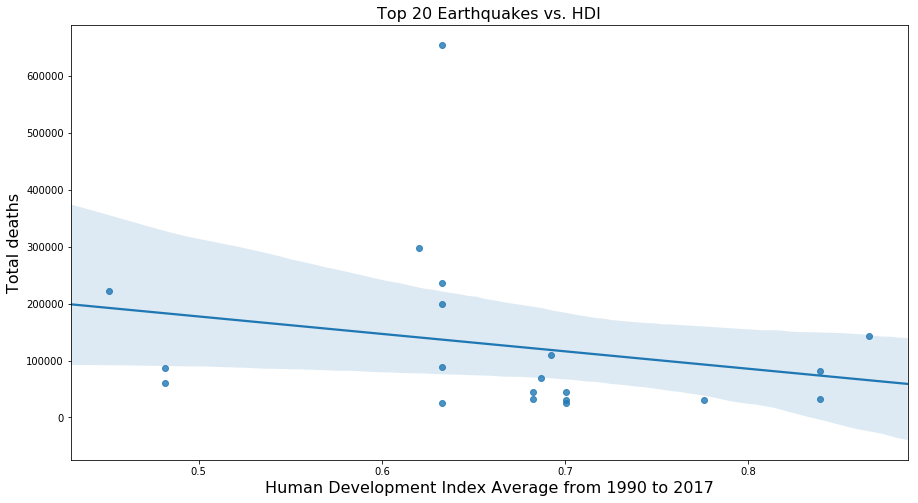

In [374]:
plt.figure(figsize=(15,8))
ax = sns.regplot(x= "HDI", y = "Max", data=GeoEarthquakes_subset3)
plt.xlabel('Human Development Index Average from 1990 to 2017', fontsize=16)
plt.ylabel('Total deaths', fontsize=16)
plt.title("Top 20 Earthquakes vs. HDI", fontsize=16)

In [375]:
Hdi_Ranking_list= [
    86,
    116,
    86,
    168,
    86,
    19,
    108,
    86,
    150,
    28,
    89,
    150,
    60,
    64,
    64,
    28,
    60,
    44,
    60,
    83
]

GeoEarthquakes_subset3['HDI Ranking'] = Hdi_Ranking_list

In [376]:
GeoEarthquakes_subset3['Max'].corr(GeoEarthquakes_subset3['HDI Ranking'])

0.24244734262809078

Text(0.5,1,'Top 20 Earthquakes vs. HDI Relative Ranking')

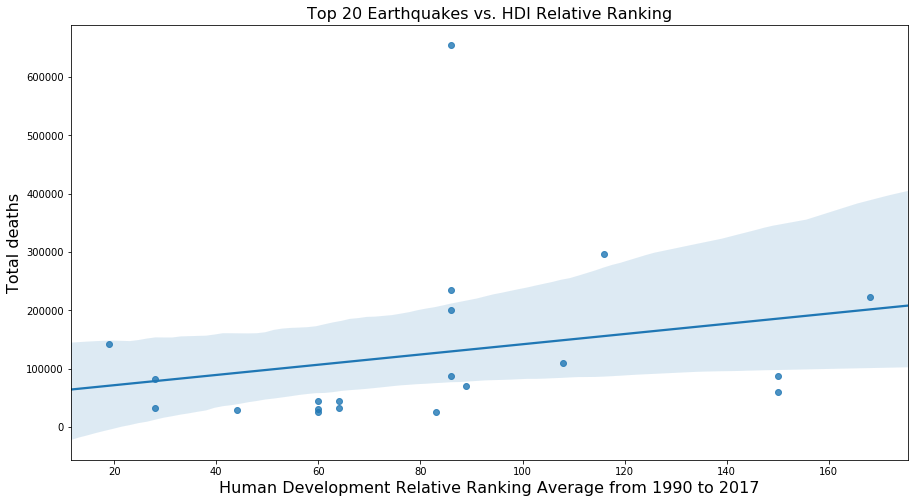

In [377]:
plt.figure(figsize=(15,8))
ax = sns.regplot(x= "HDI Ranking", y = "Max", data=GeoEarthquakes_subset3)
plt.xlabel('Human Development Relative Ranking Average from 1990 to 2017', fontsize=16)
plt.ylabel('Total deaths', fontsize=16)
plt.title("Top 20 Earthquakes vs. HDI Relative Ranking", fontsize=16)

# There is a weak positive correlation for the HDI Relative Ranking Avearge and Total Deaths. This makes sense, as the relative ranking goes down, we would expect the total deaths to increase. 